# Plotting Using Matplotlib

* [The Matplotlib docs can be found here](https://matplotlib.org/contents.html)
* [The Matplotlib code gallery can be found here](https://matplotlib.org/gallery/index.html)


## Table of Contents 

* `Hello World` 
    * scatter
    * plot
    * setting limits
    * formatting plots
* Multiple plots 
* Annotating plots
    * labels
    * ticks
    * axes scales
    * legends
    * text
* Other types of matplotlib plots
    * bars 
    * histograms
    * imshow
* Plotting uncertainty
    * errorbars
    * boxplot
    * fillbetween
    * raw data
* Saving plots

## Setup

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### Customizing plot styles

In [43]:
# this is how you set plot styling globally

# Make legend text small
plt.rcParams['legend.fontsize'] = 'small' 
# Shrink axes labels a bit 
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
# Set limits on when scientific notation is used
plt.rcParams['axes.formatter.limits'] = [-2, 3] 
# Use LaTeX to format axes labels and numbers
plt.rcParams['axes.formatter.use_mathtext'] = True
# Get rid of spines on top and bottom
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
# Ticks point in  
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# Change DPI of figure images
plt.rcParams['figure.dpi'] = 150

In [44]:
# Here are ALL the options

plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-2, 3],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': True,
          'axes.fo

## `Hello World`

In [52]:
# Generating some random data  

X = np.random.rand(100)
Y = np.random.rand(100)

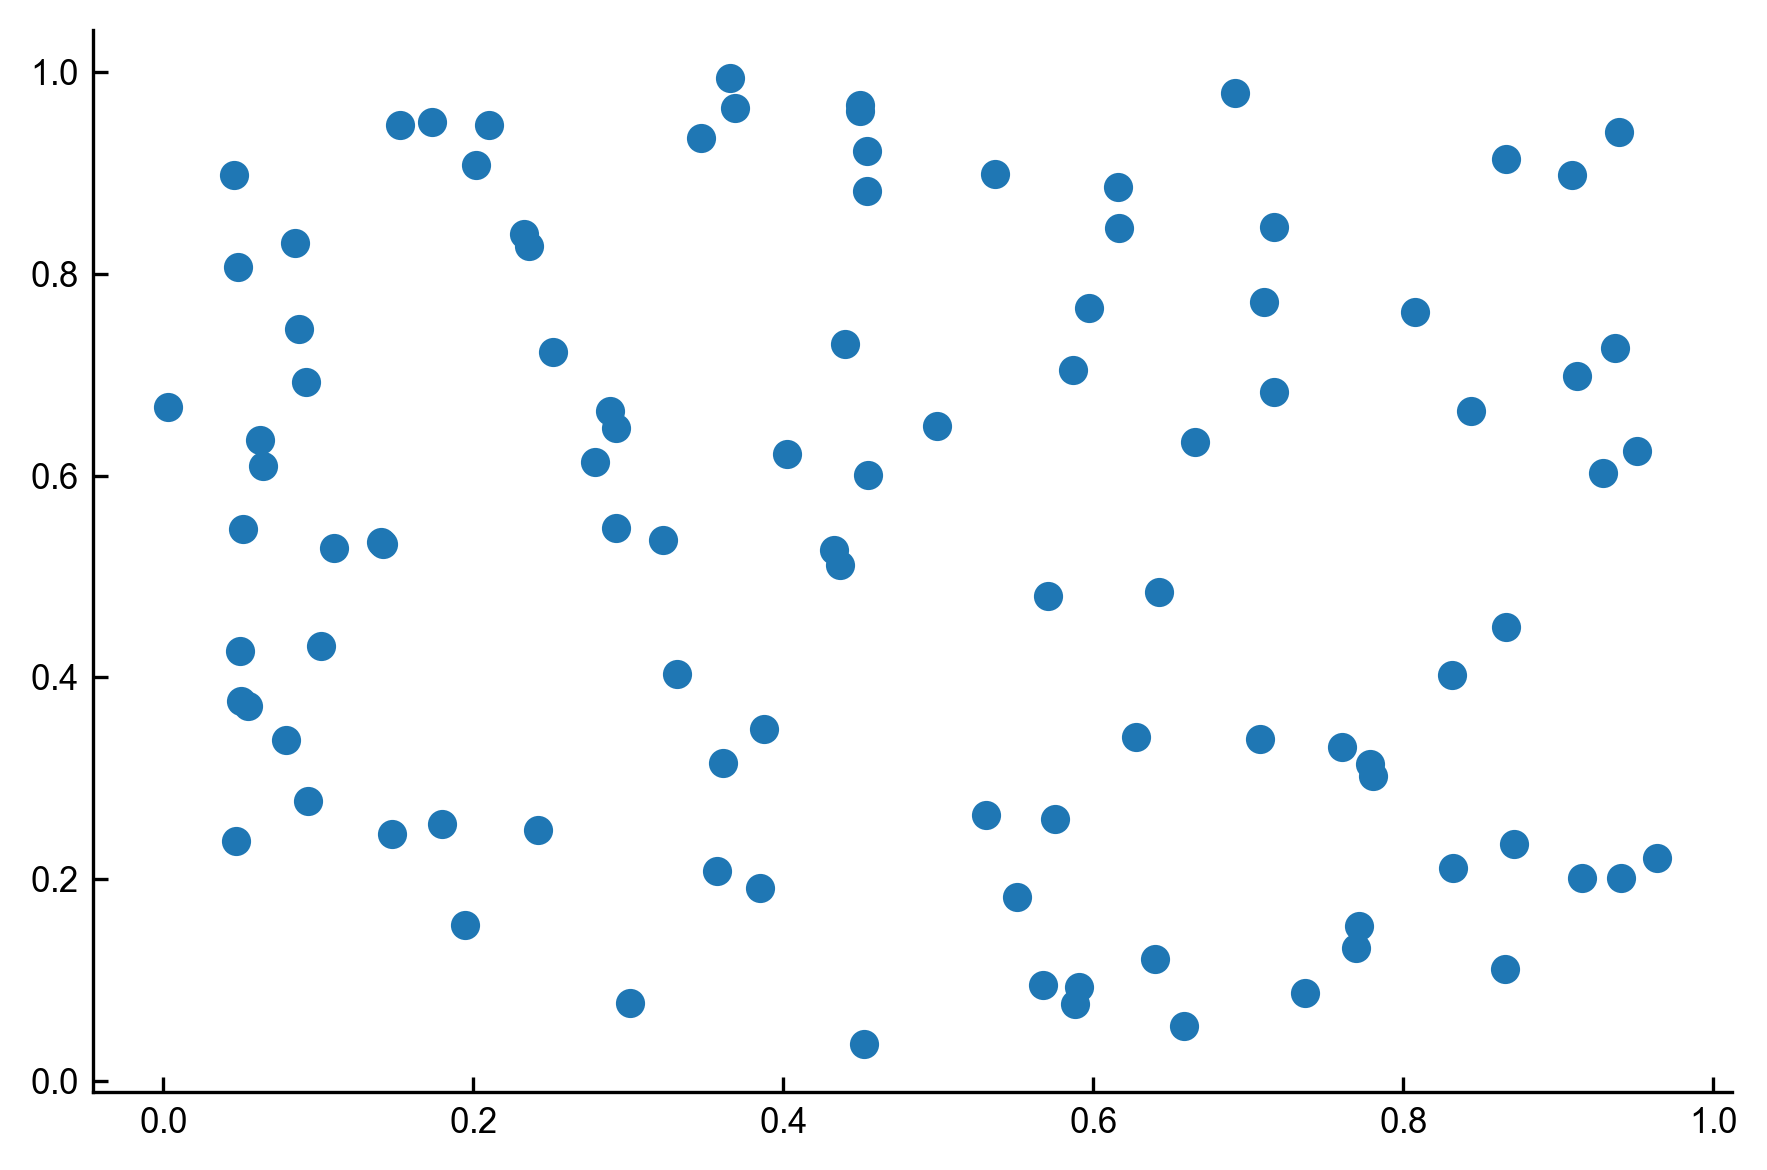

In [53]:
# Quickest code for making a scatter plot

plt.scatter(X, Y)

In [54]:
# Generating some very not random data

X2 = np.linspace(-10, 10, 1000)
Y2 = np.sin(X2)

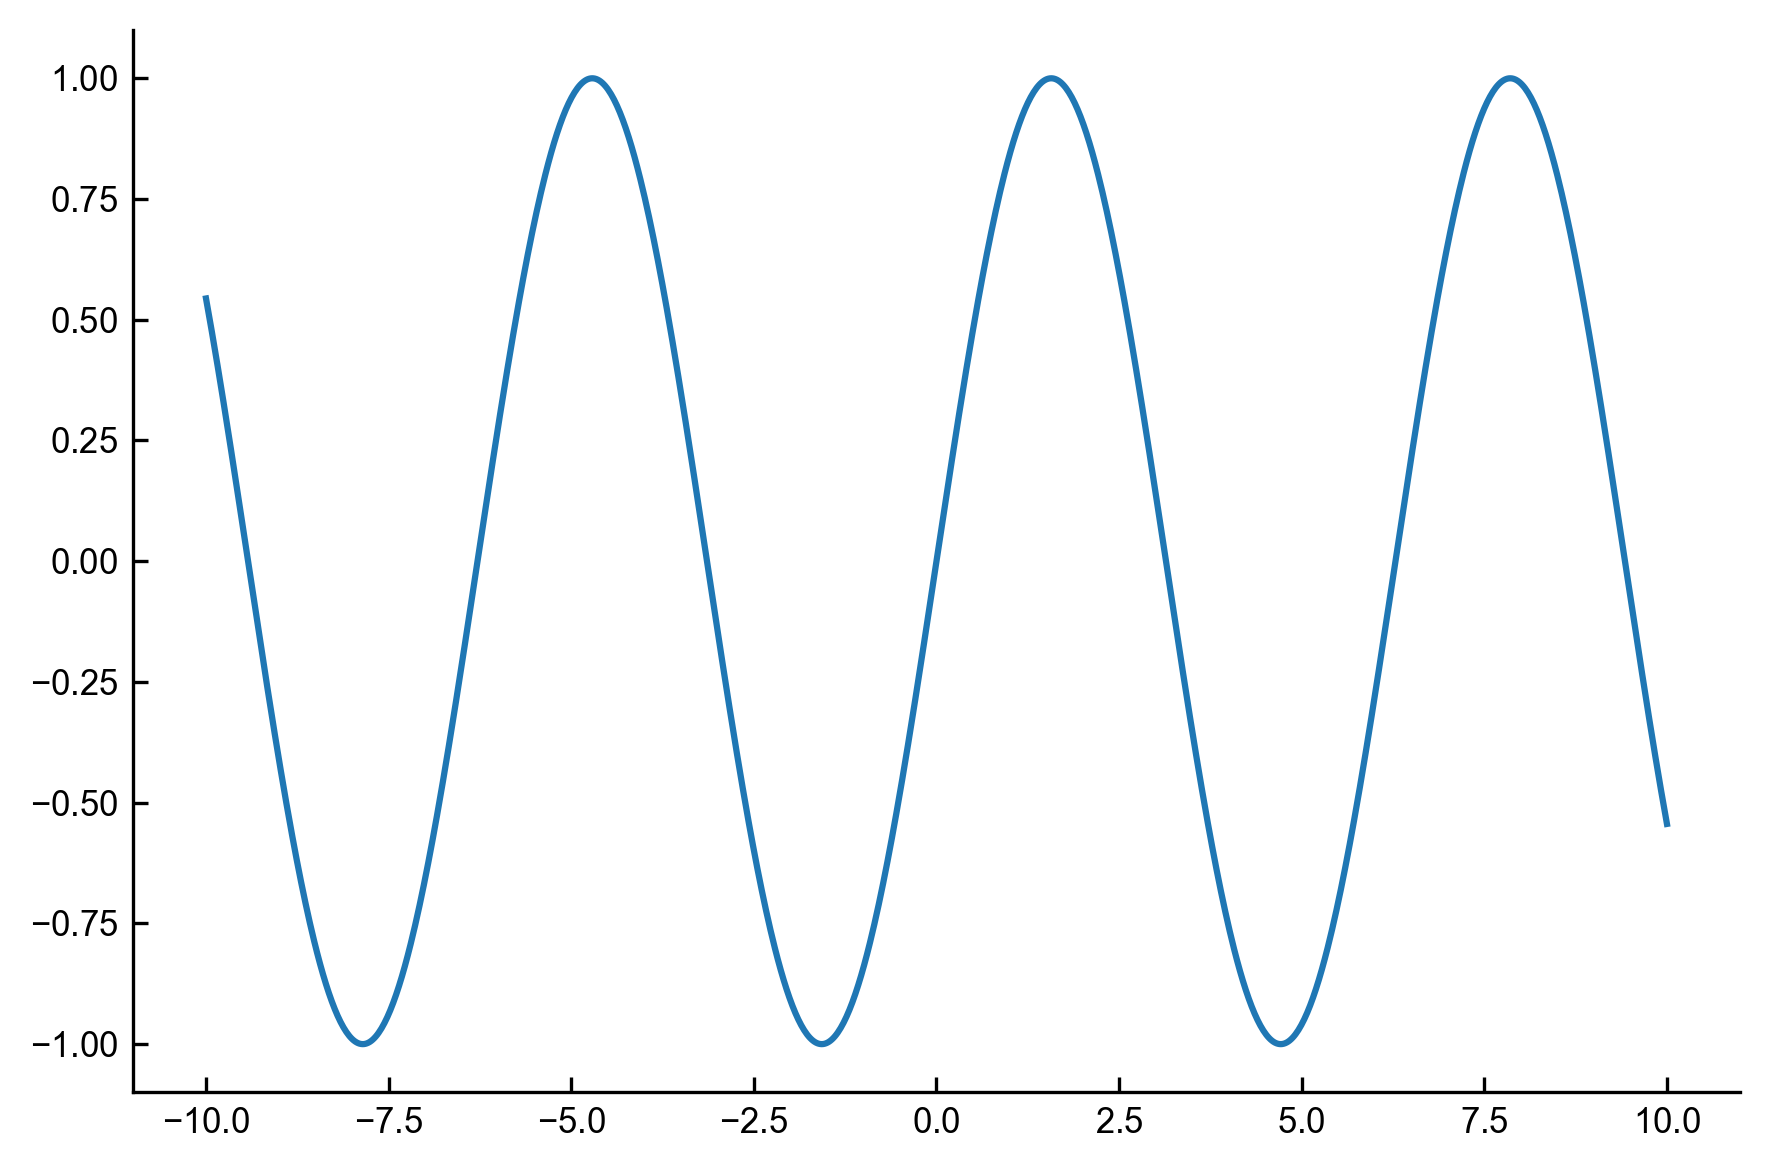

In [55]:
# Quickest way to plot a pair of variables

plt.plot(X2, Y2)

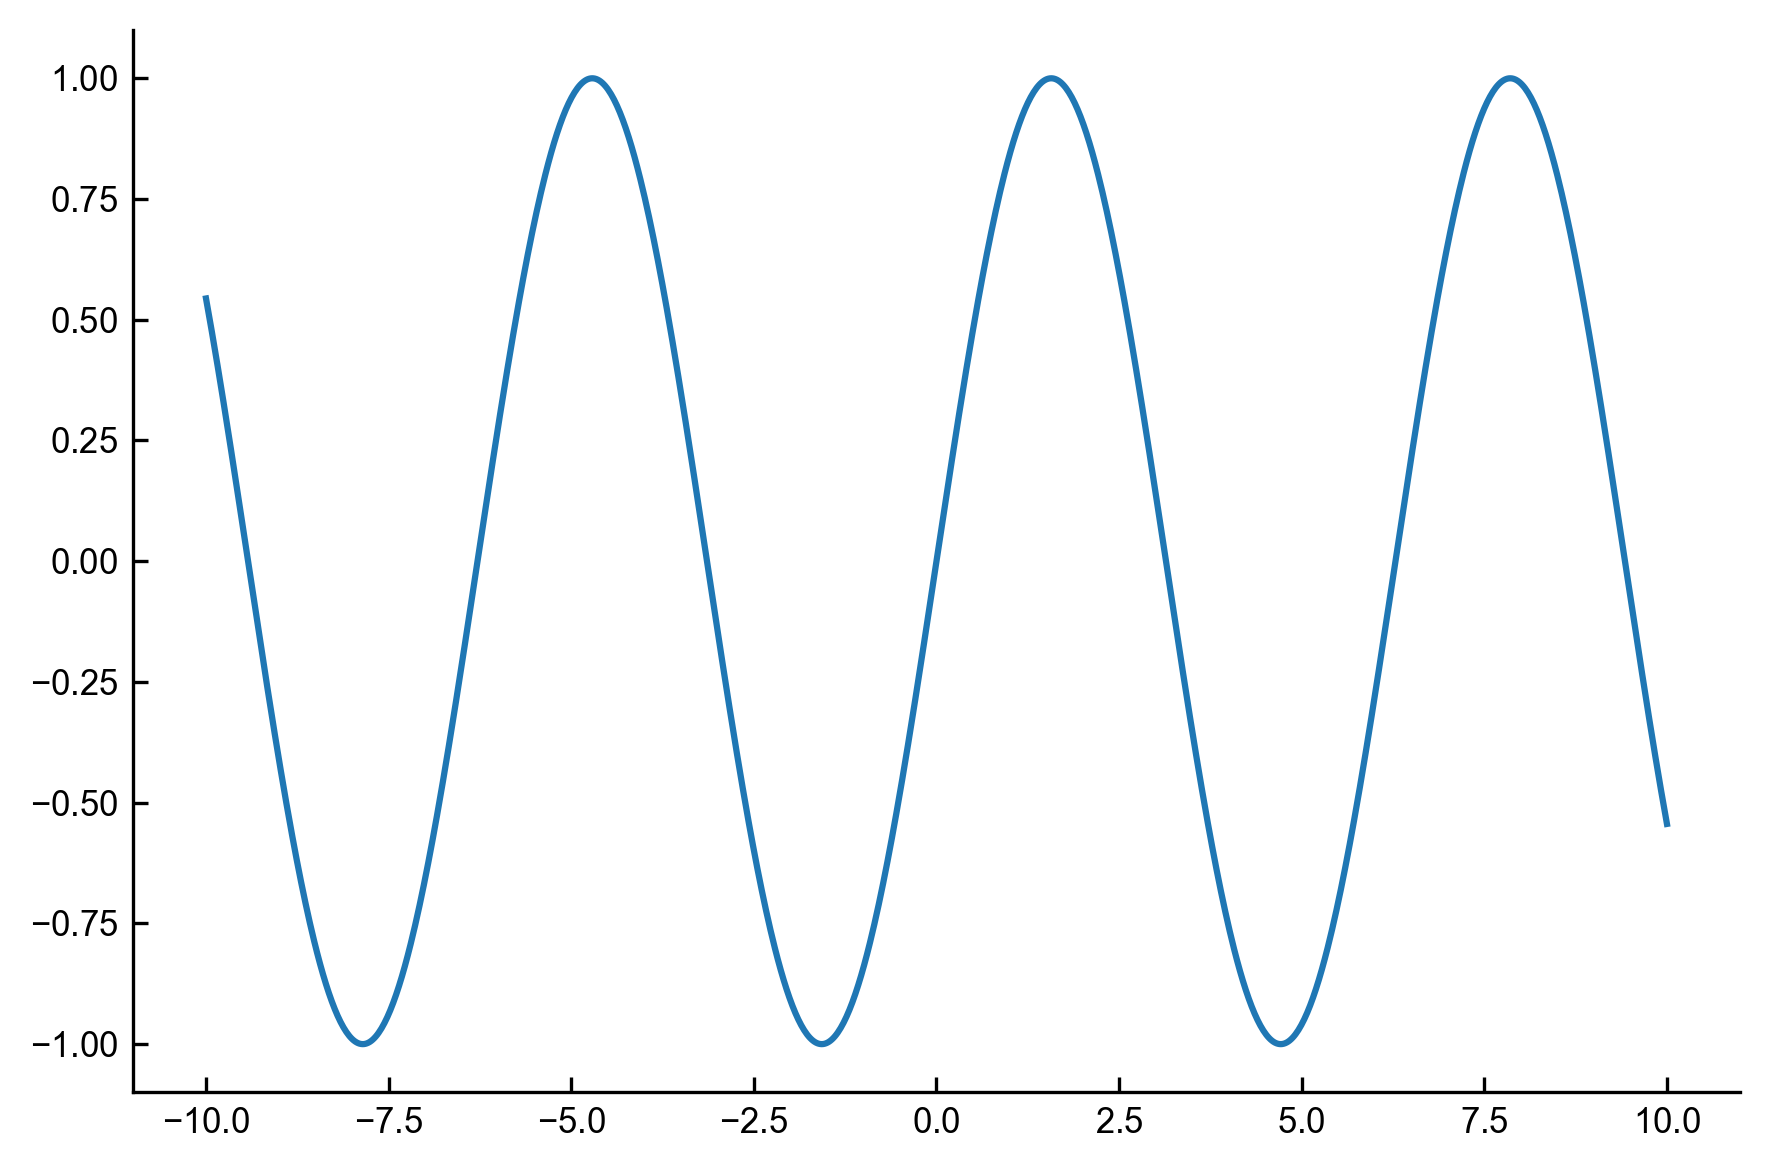

In [60]:
# Preferred object-oriented method for creating a plot 
# (Trust me it will help later)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X2, Y2)

(0.0, 5.0)

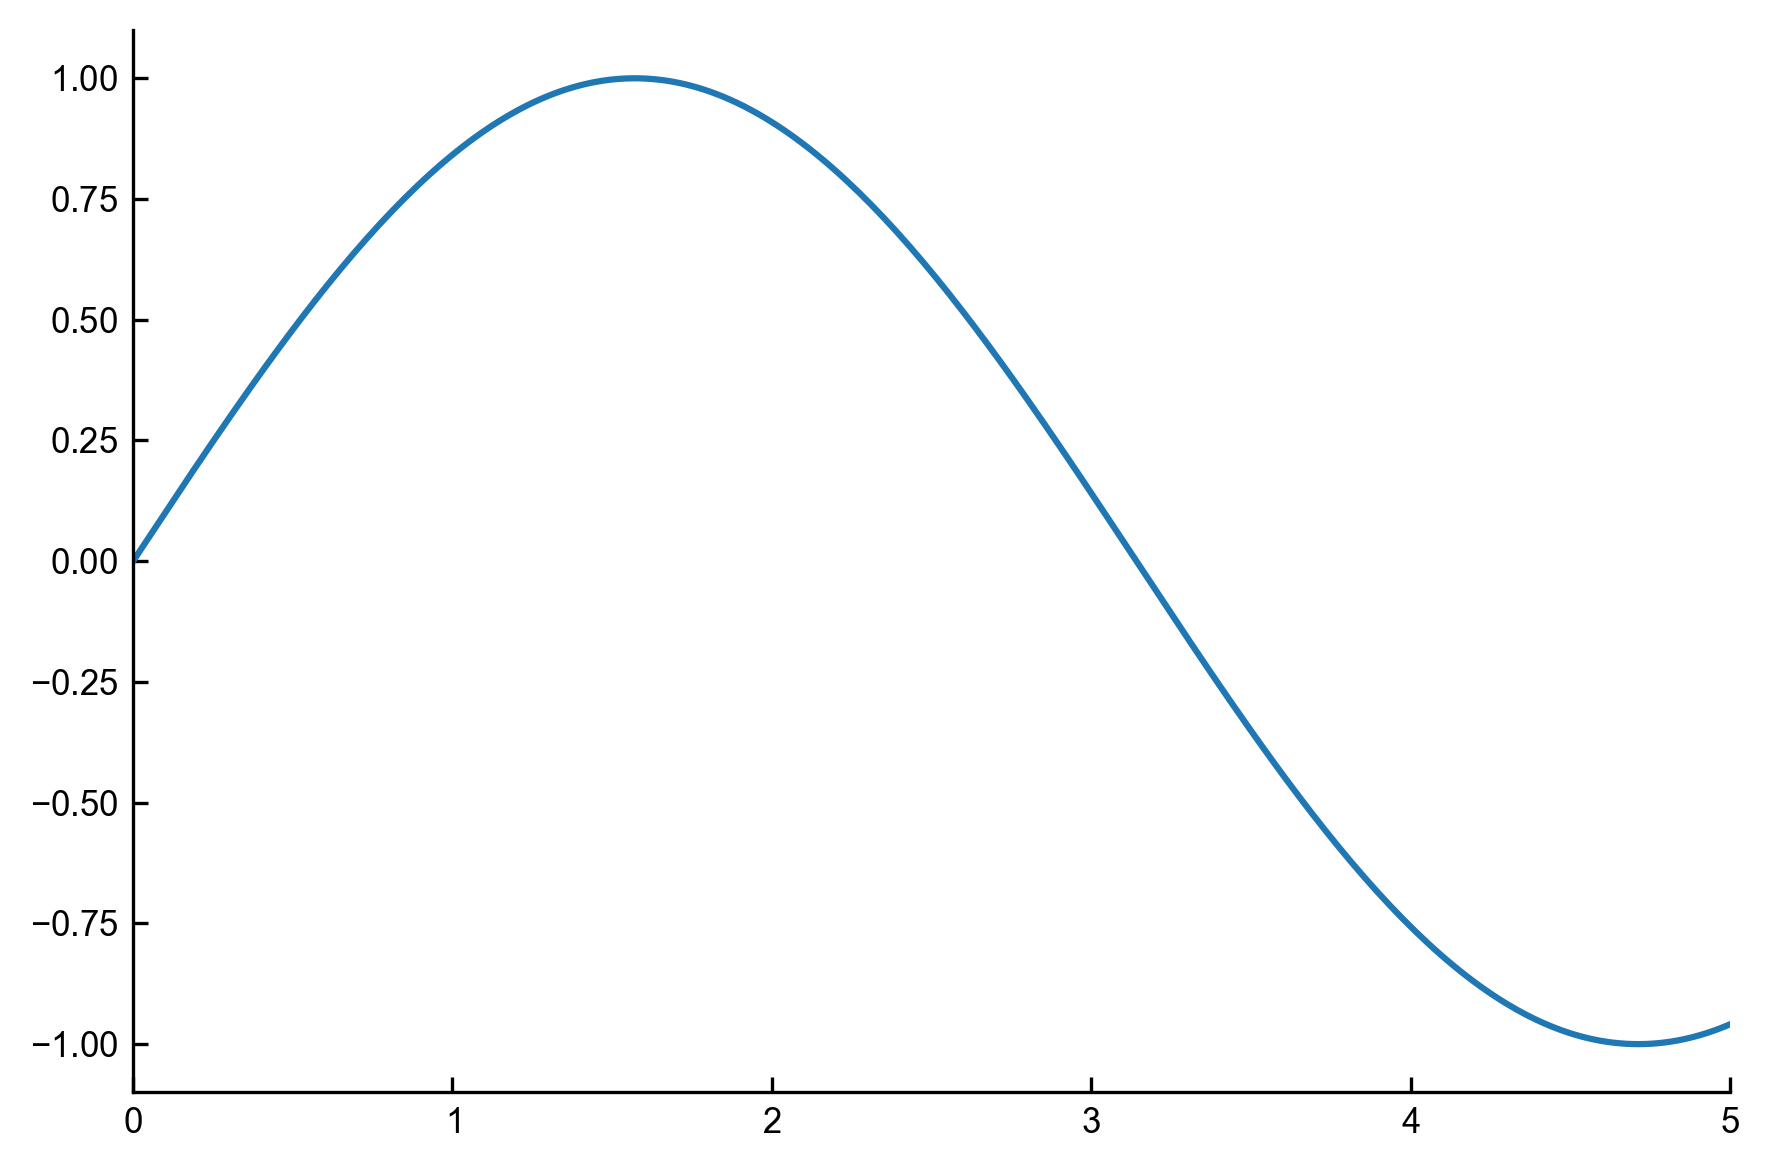

In [61]:
# Now it's easy to modify things about the plot (such as the limits displayed)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X2, Y2)
ax.set_xlim(0, 5)

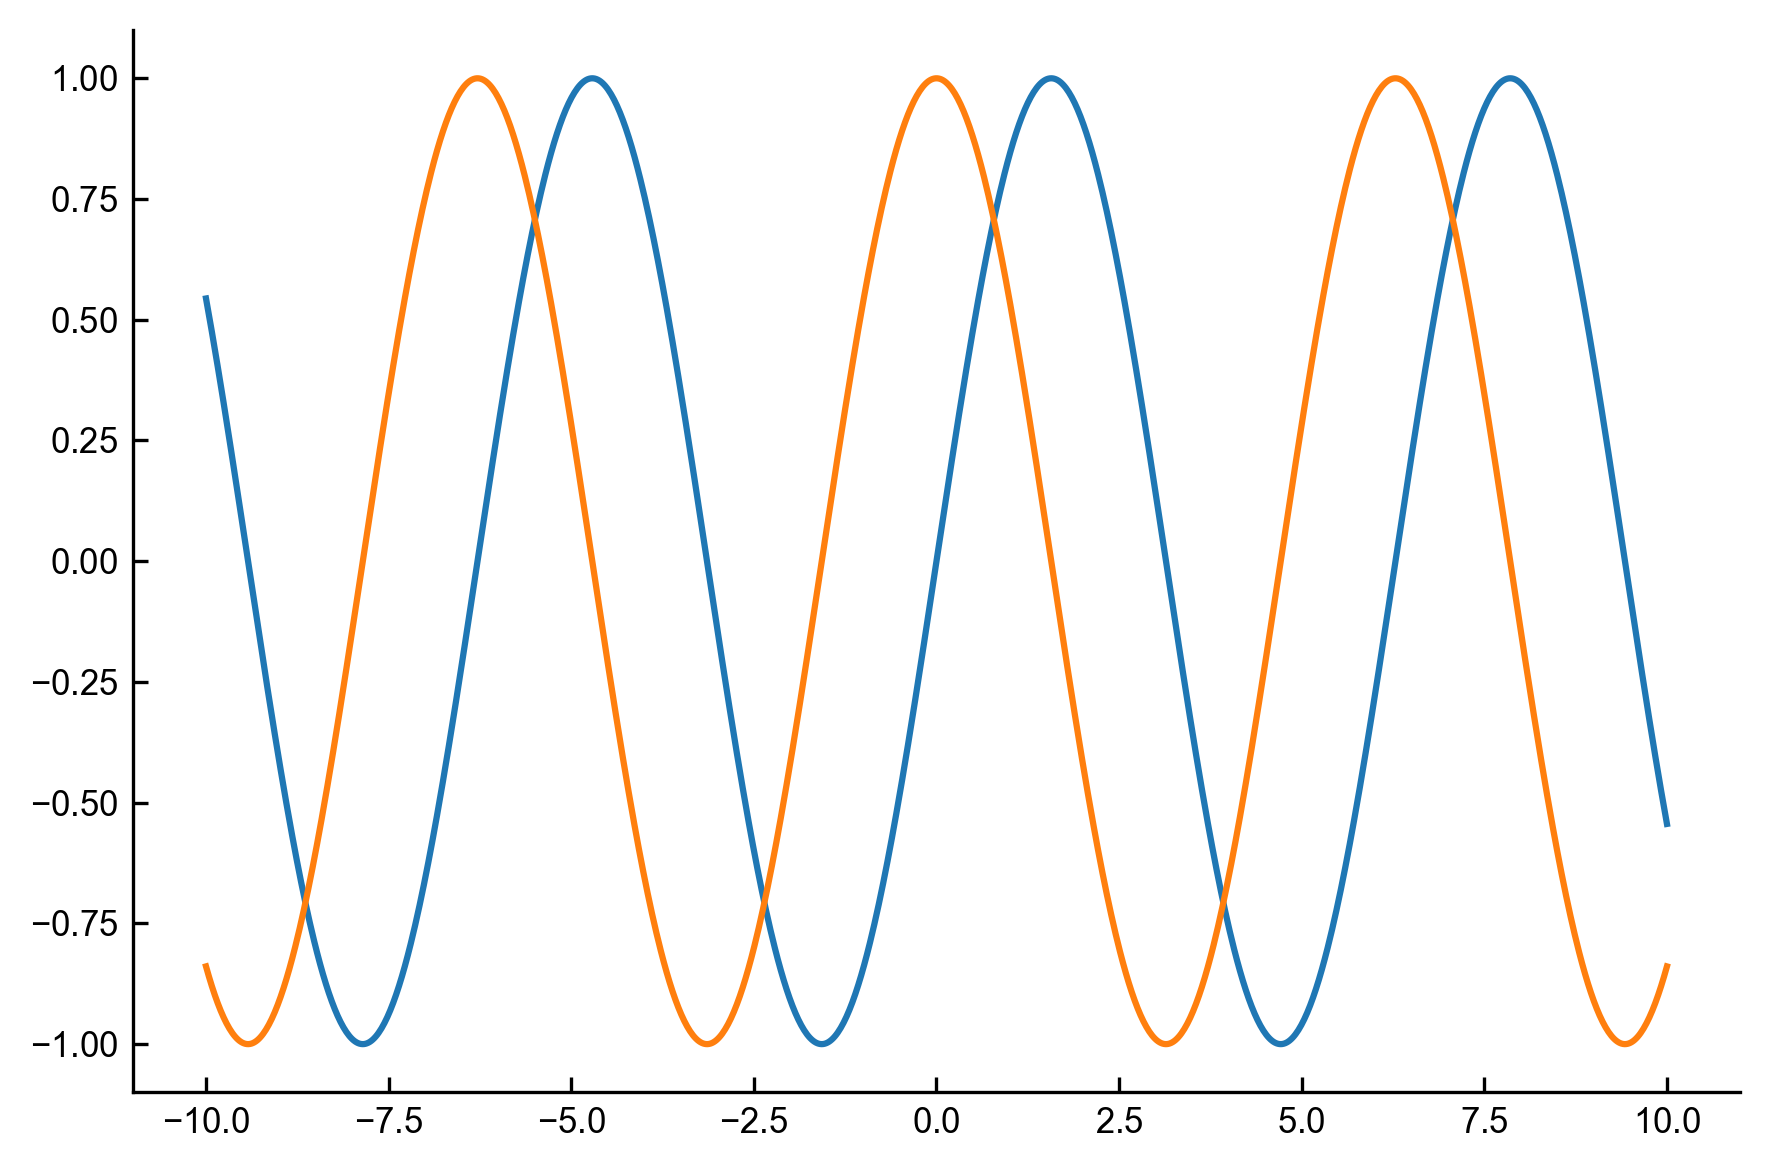

In [69]:
# Or plot two things on the same set of axes

# Making some new data with the same X values
Y3 = np.cos(X2)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X2, Y2)
ax.plot(X2, Y3)

In [ ]:
### Formatting plots

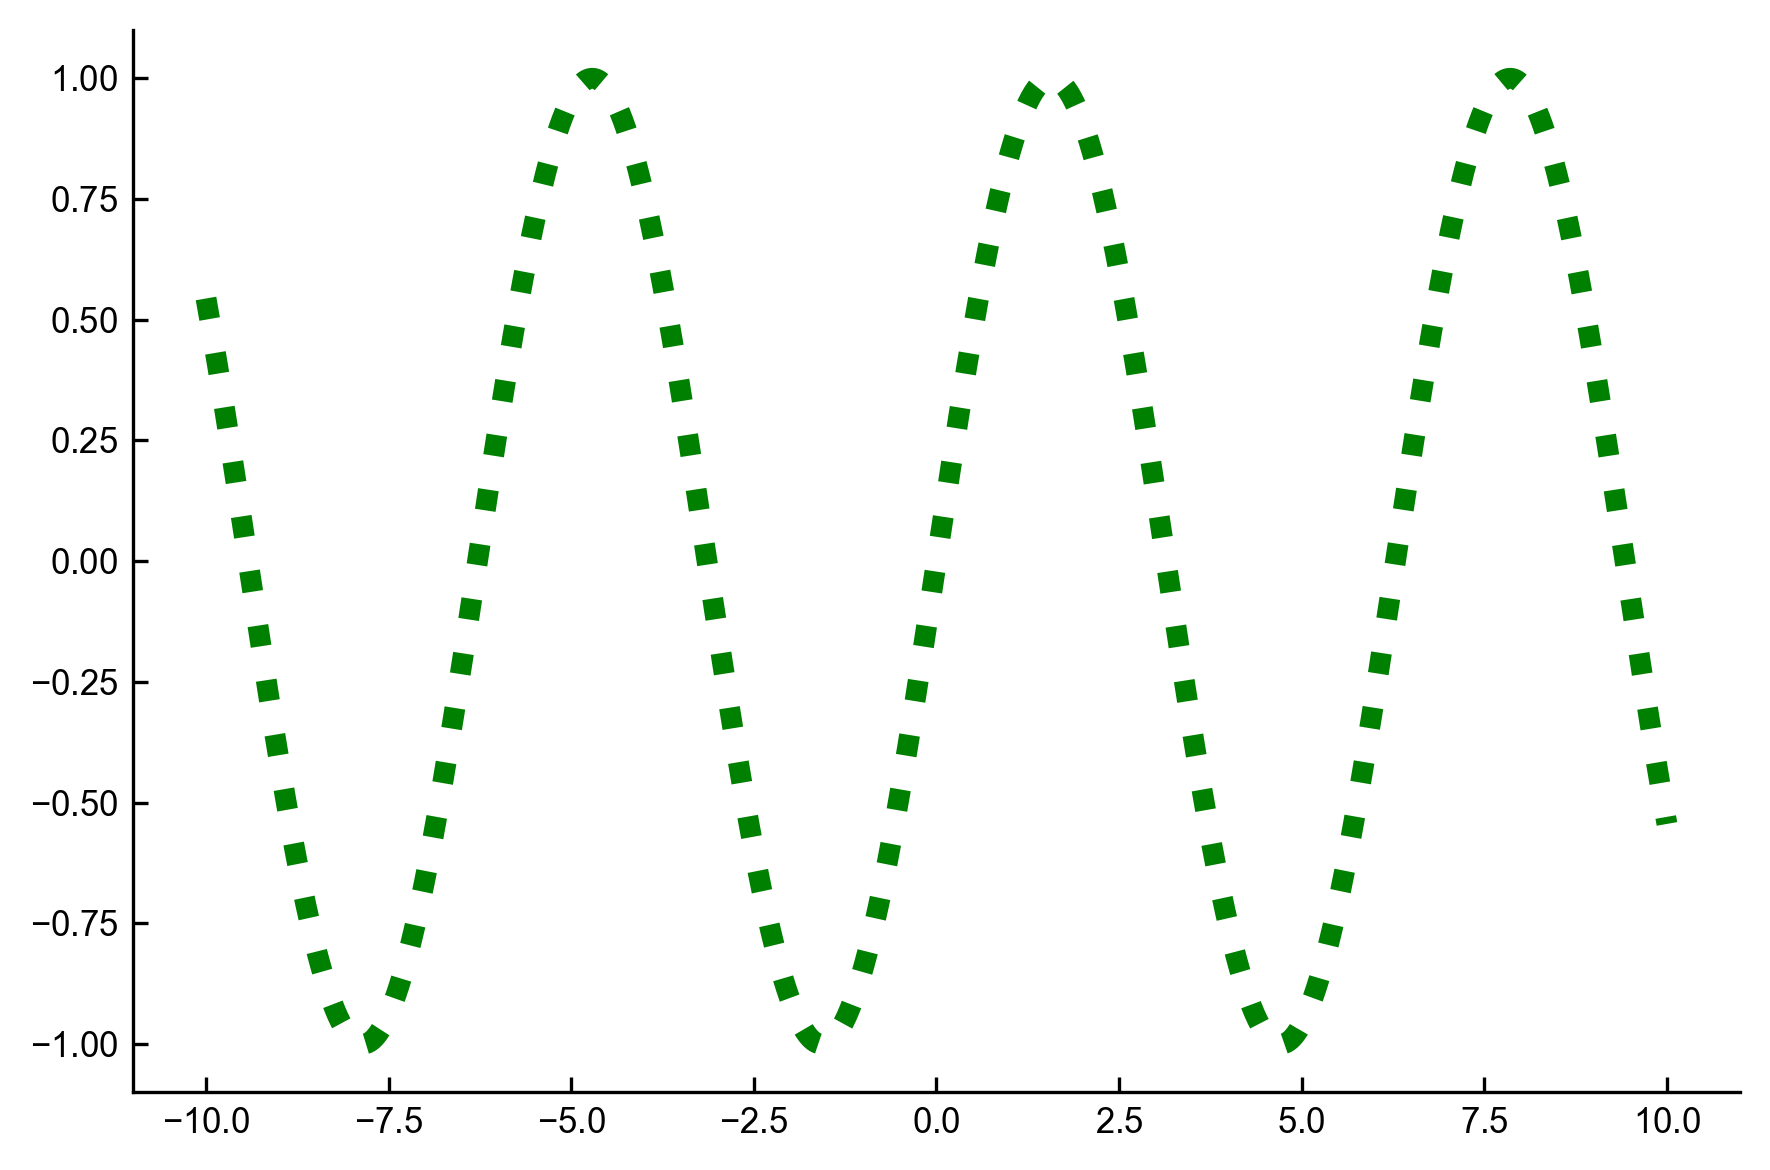

In [70]:
# Can change LOTS of styling elements of plots. For example

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X2, Y2, linewidth=5, linestyle=":", color='green')

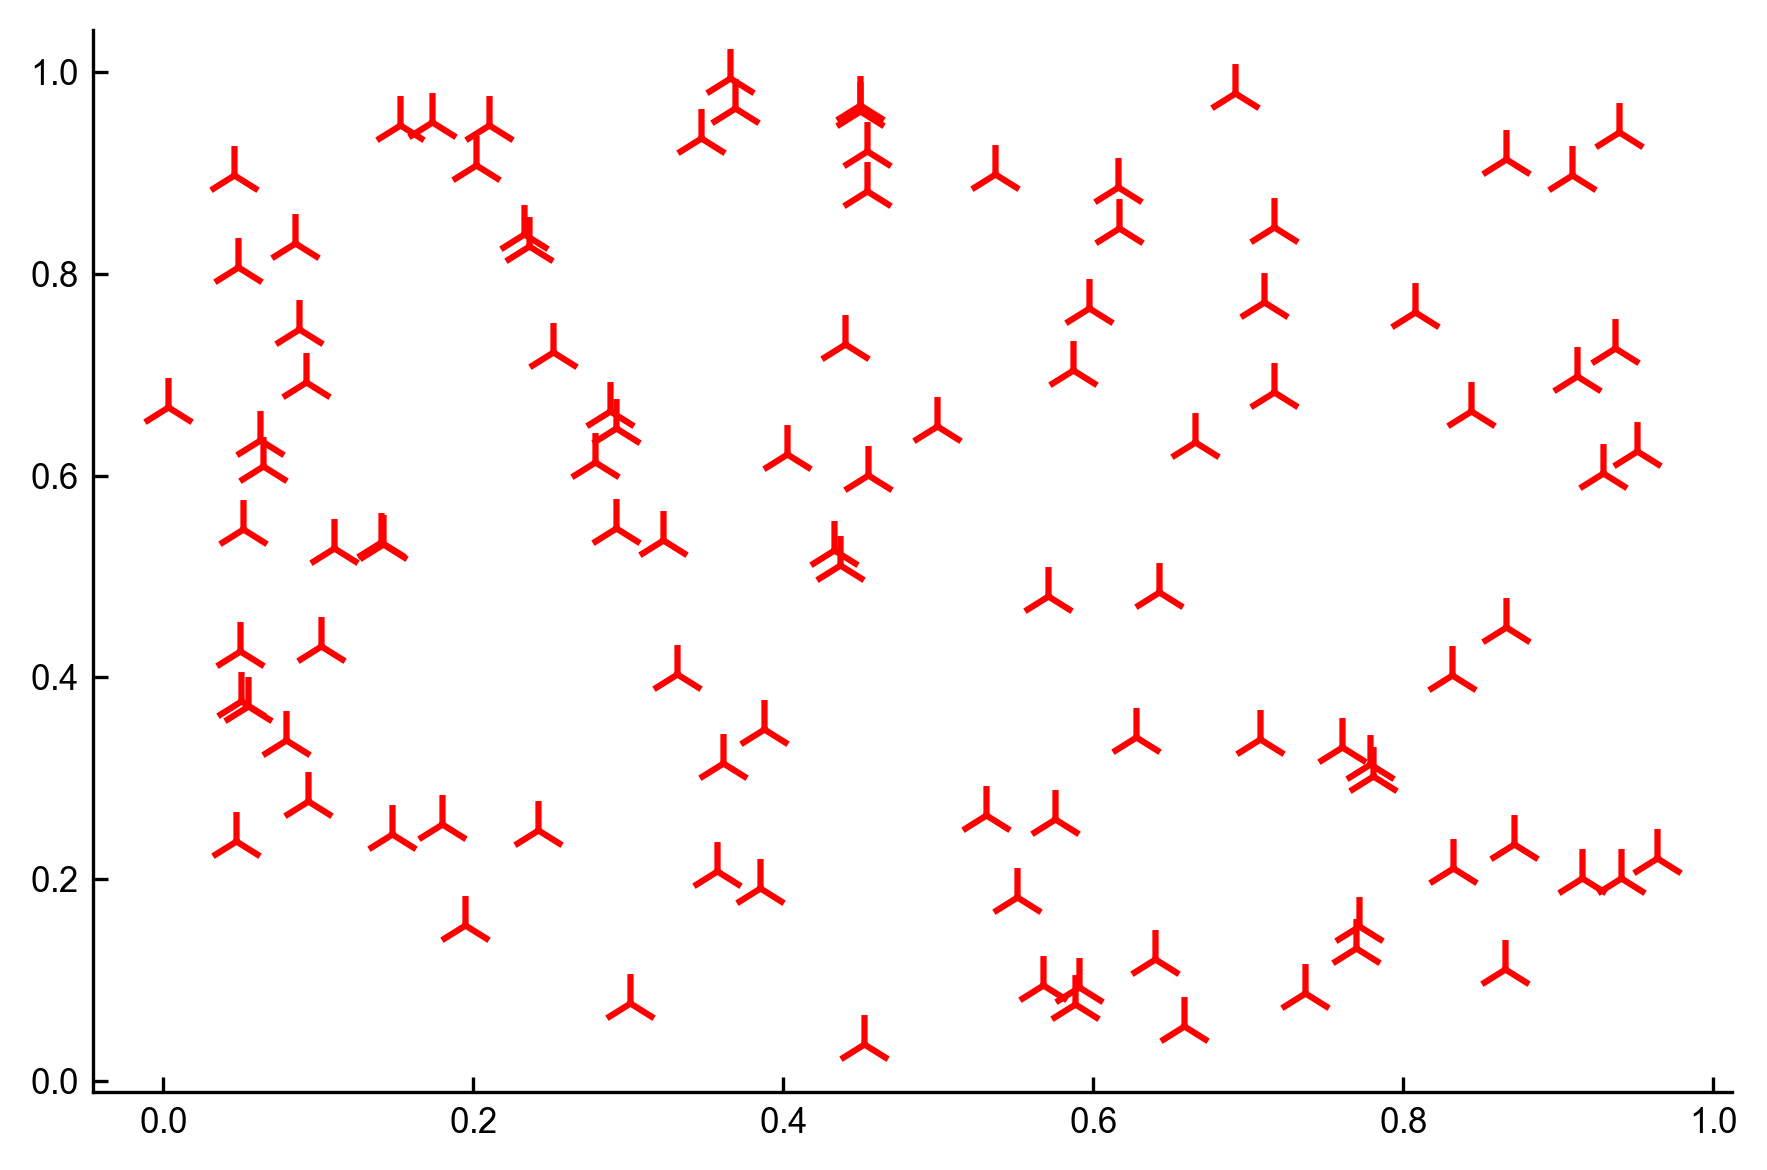

In [74]:
# OR 

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X, Y, marker='2', c='red', s=200)

In [ ]:
# PROBLEM: 
# 1. Generate some new data 
# 2. Look up some new ways to style in the matplotlib documentation or gallery,
# 3. Make something beautiful 









## Multiple plots 

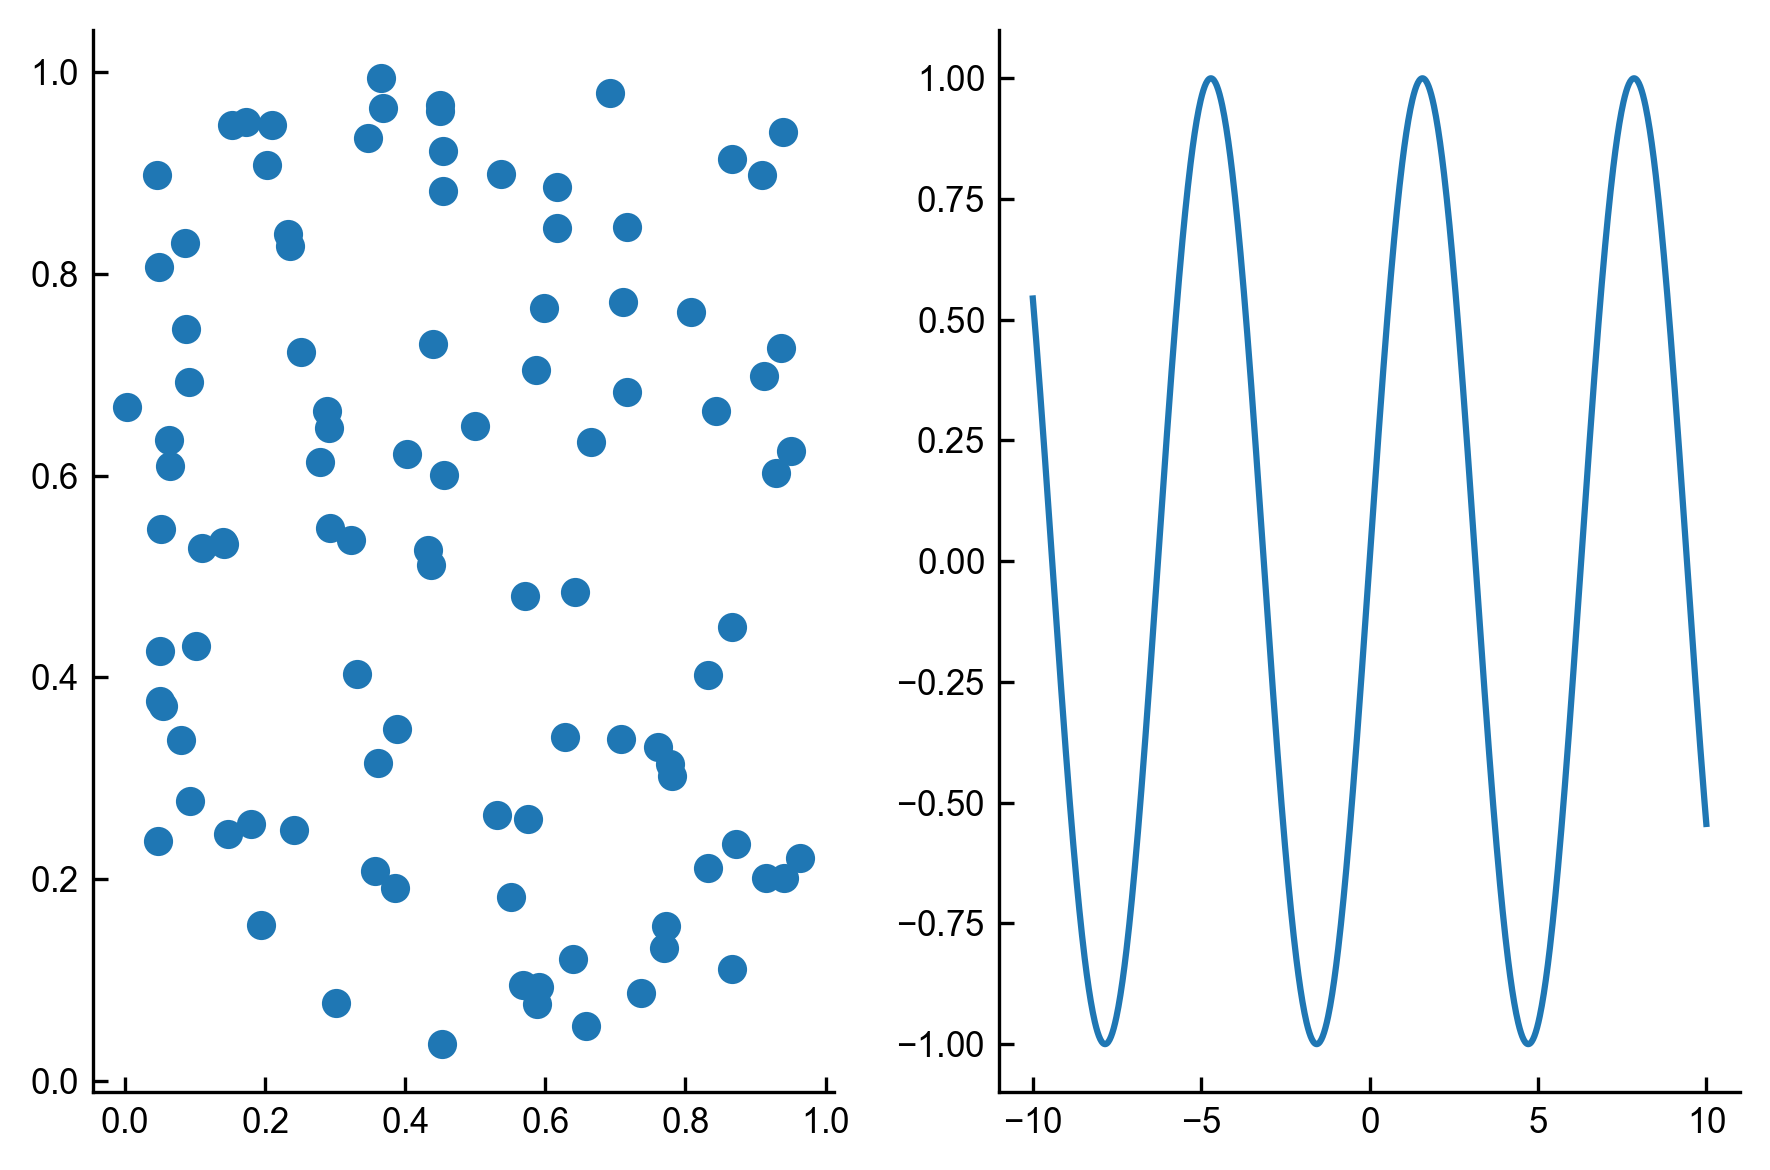

In [58]:
# Quick way to make two plots size by side

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.scatter(X, Y)
ax2.plot(X2, Y2)

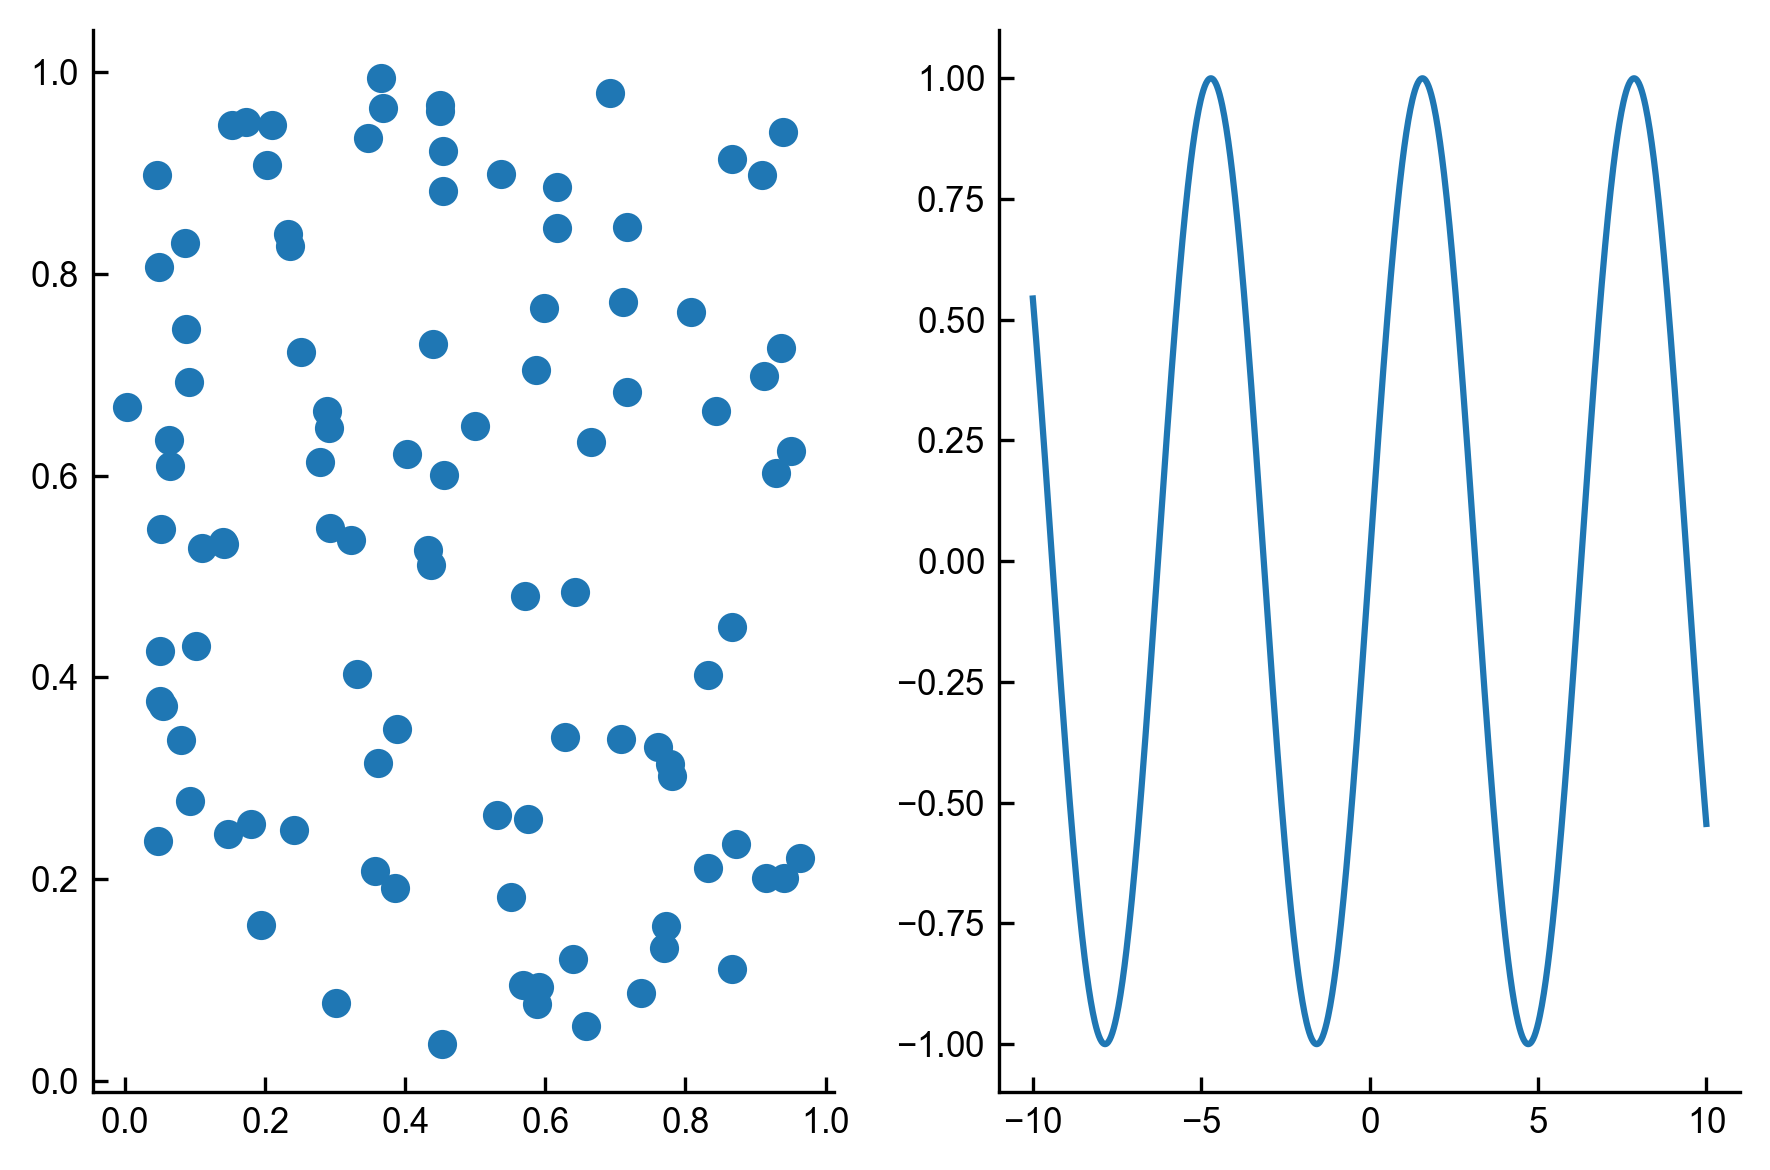

In [57]:
# Quick way to make two plots size by side. 
# Note that here we are taking both axes together as one object `axs` 
# and accessing them when you 

fig, axs = plt.subplots(ncols=2)
axs[0].scatter(X, Y)
axs[1].plot(X2, Y2)

(-0.25, 1.0)

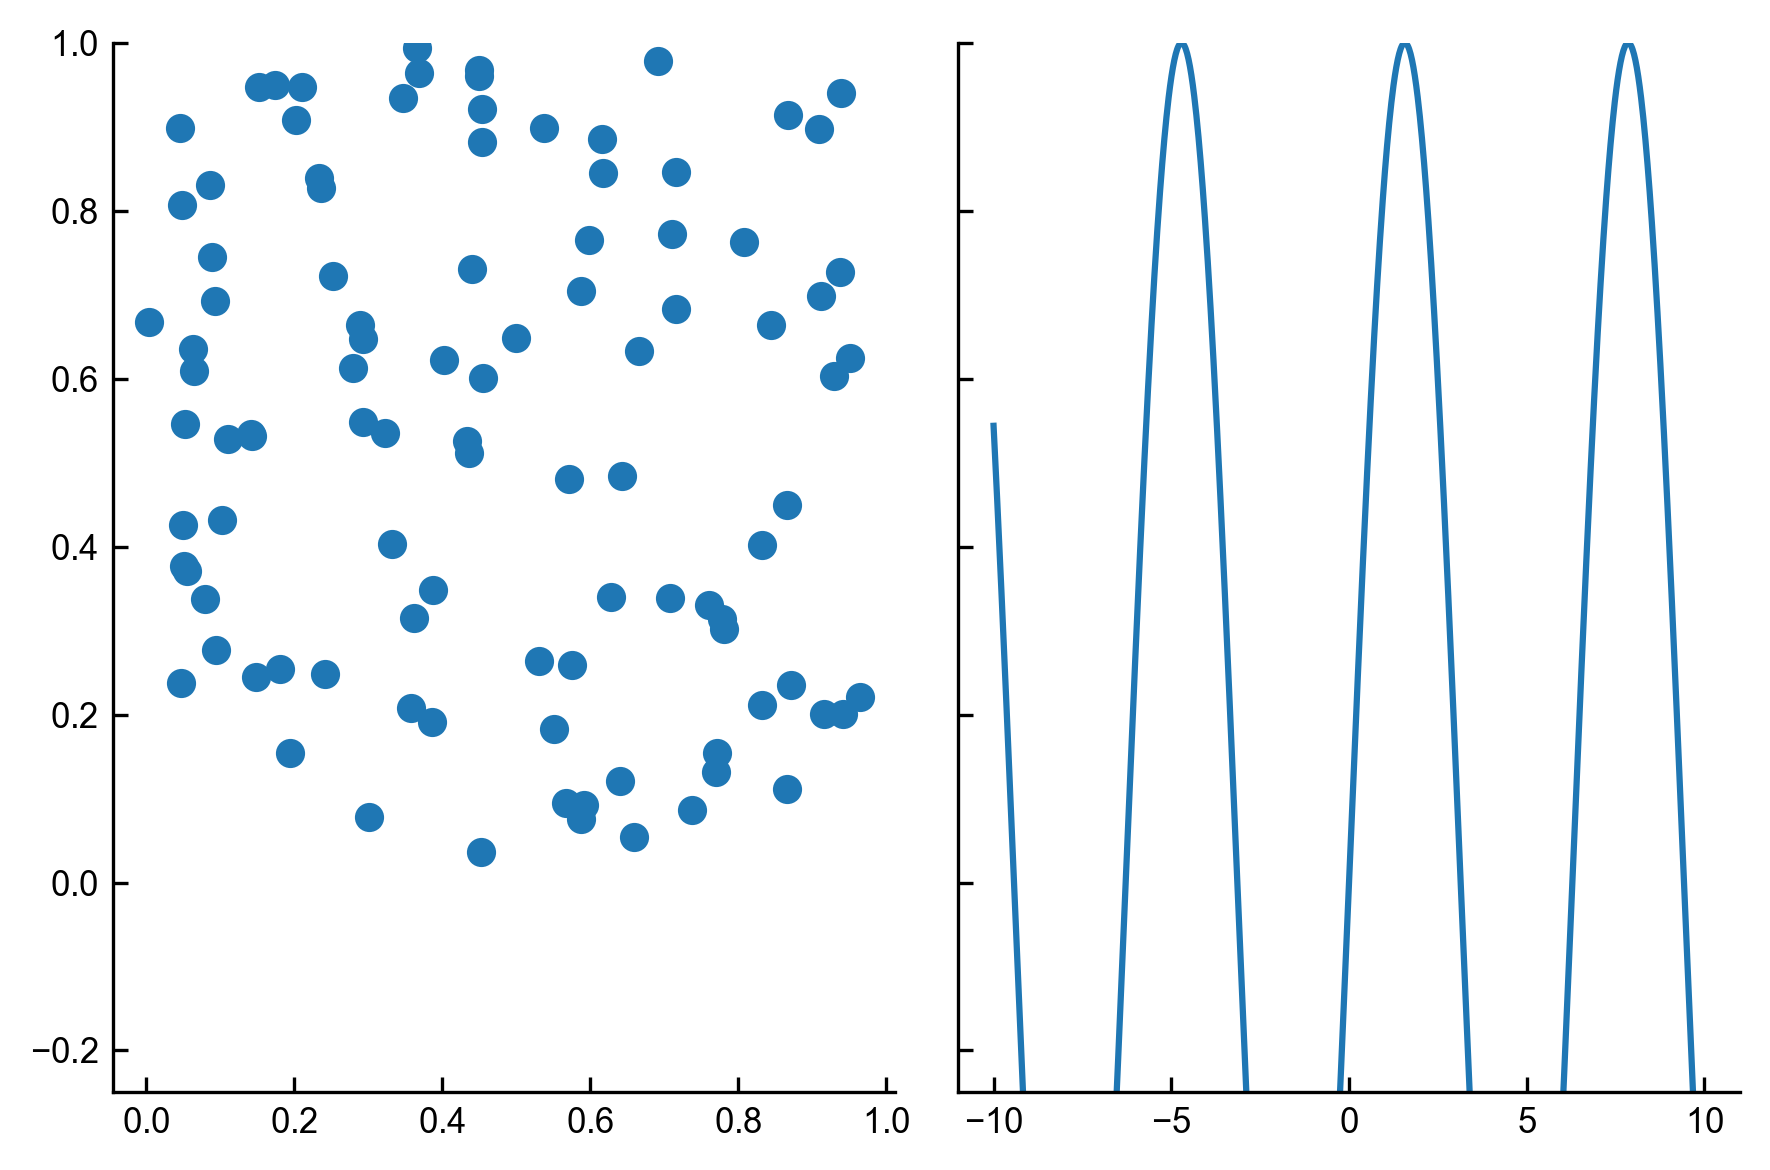

In [64]:
# Here I'm using the `sharey` keyword to have them use the same ylimits automatically

fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].scatter(X, Y)
axs[1].plot(X2, Y2)
axs[0].set_ylim(-.25, 1)

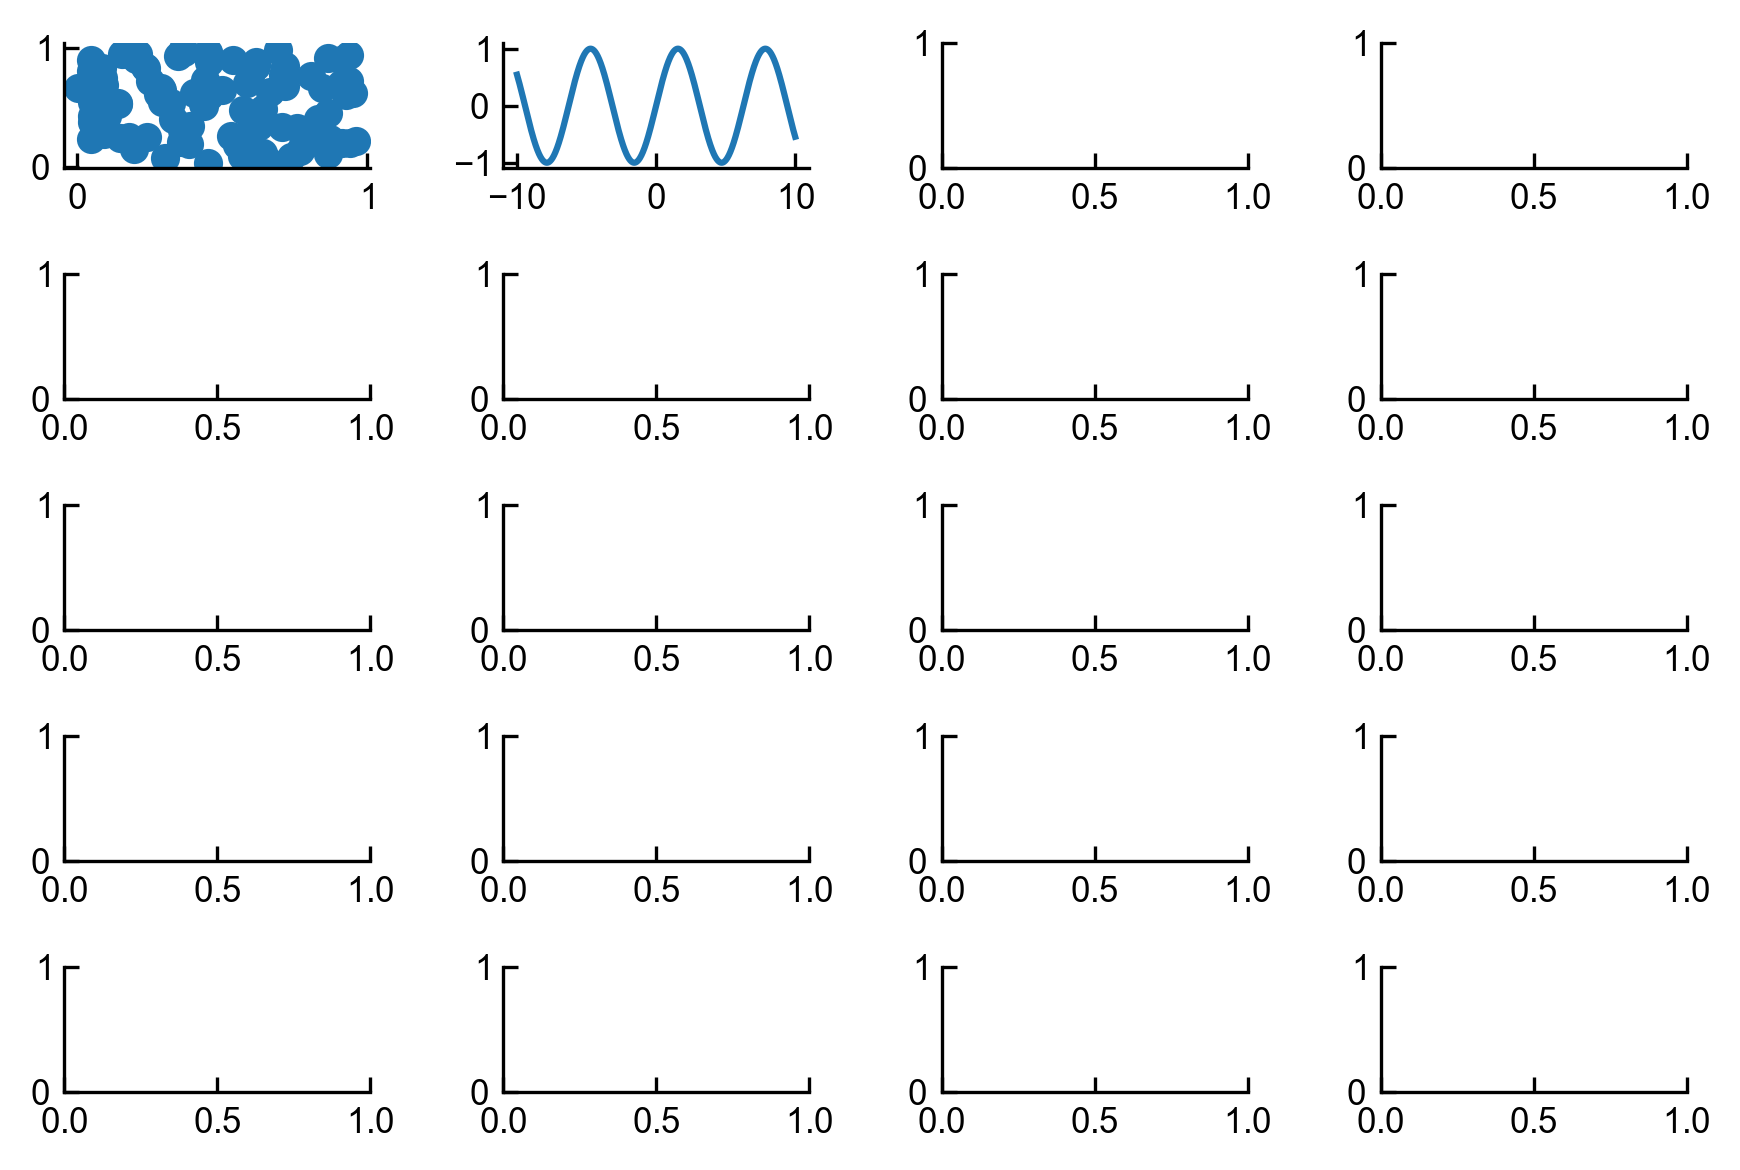

In [67]:
# Can even access axes as an array 

fig, axs = plt.subplots(nrows=5, ncols=4)
axs[0,0].scatter(X, Y)
axs[0,1].plot(X2, Y2)

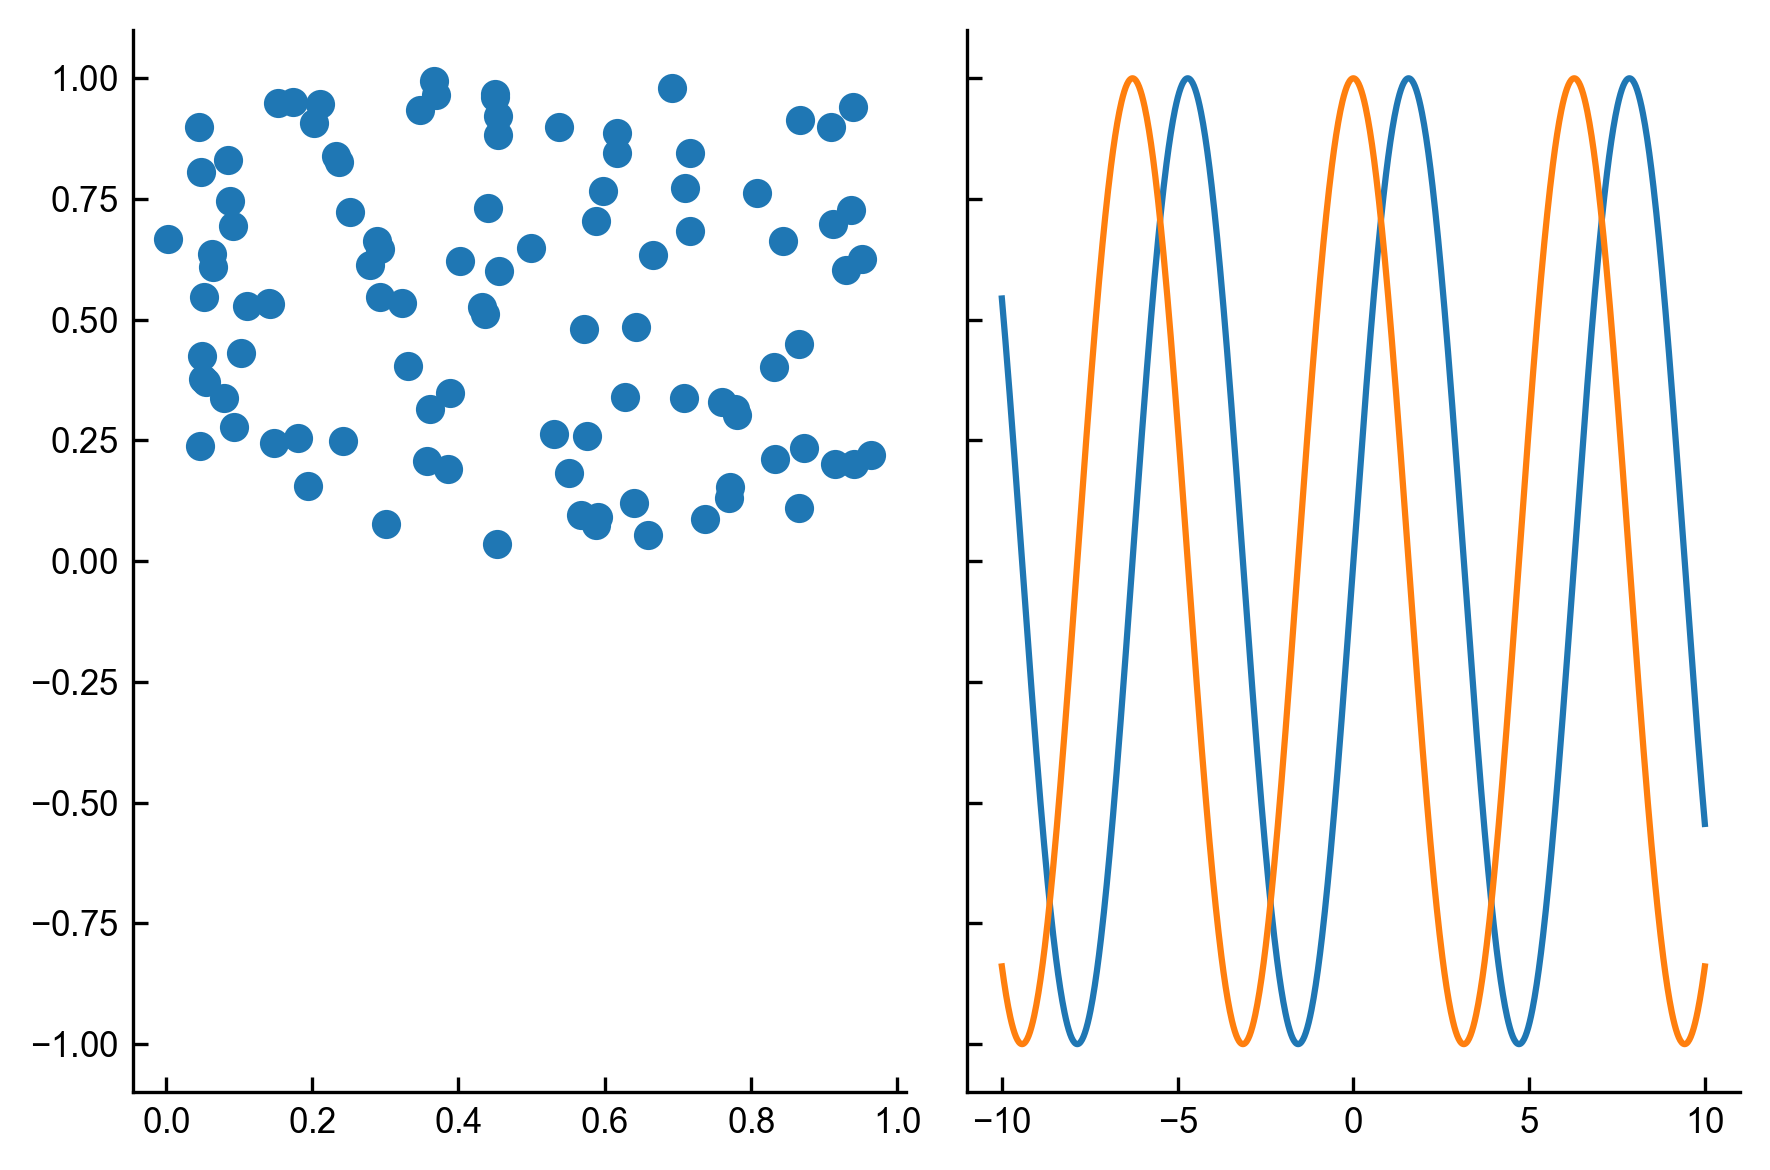

In [86]:
Y3 = np.cos(X2)

fig, axs = plt.subplots(ncols=2,  sharey=True)
axs[0].scatter(X, Y)
axs[1].plot(X2, Y2)
axs[1].plot(X2, Y3)
fig.tight_layout()

## Annotating plots

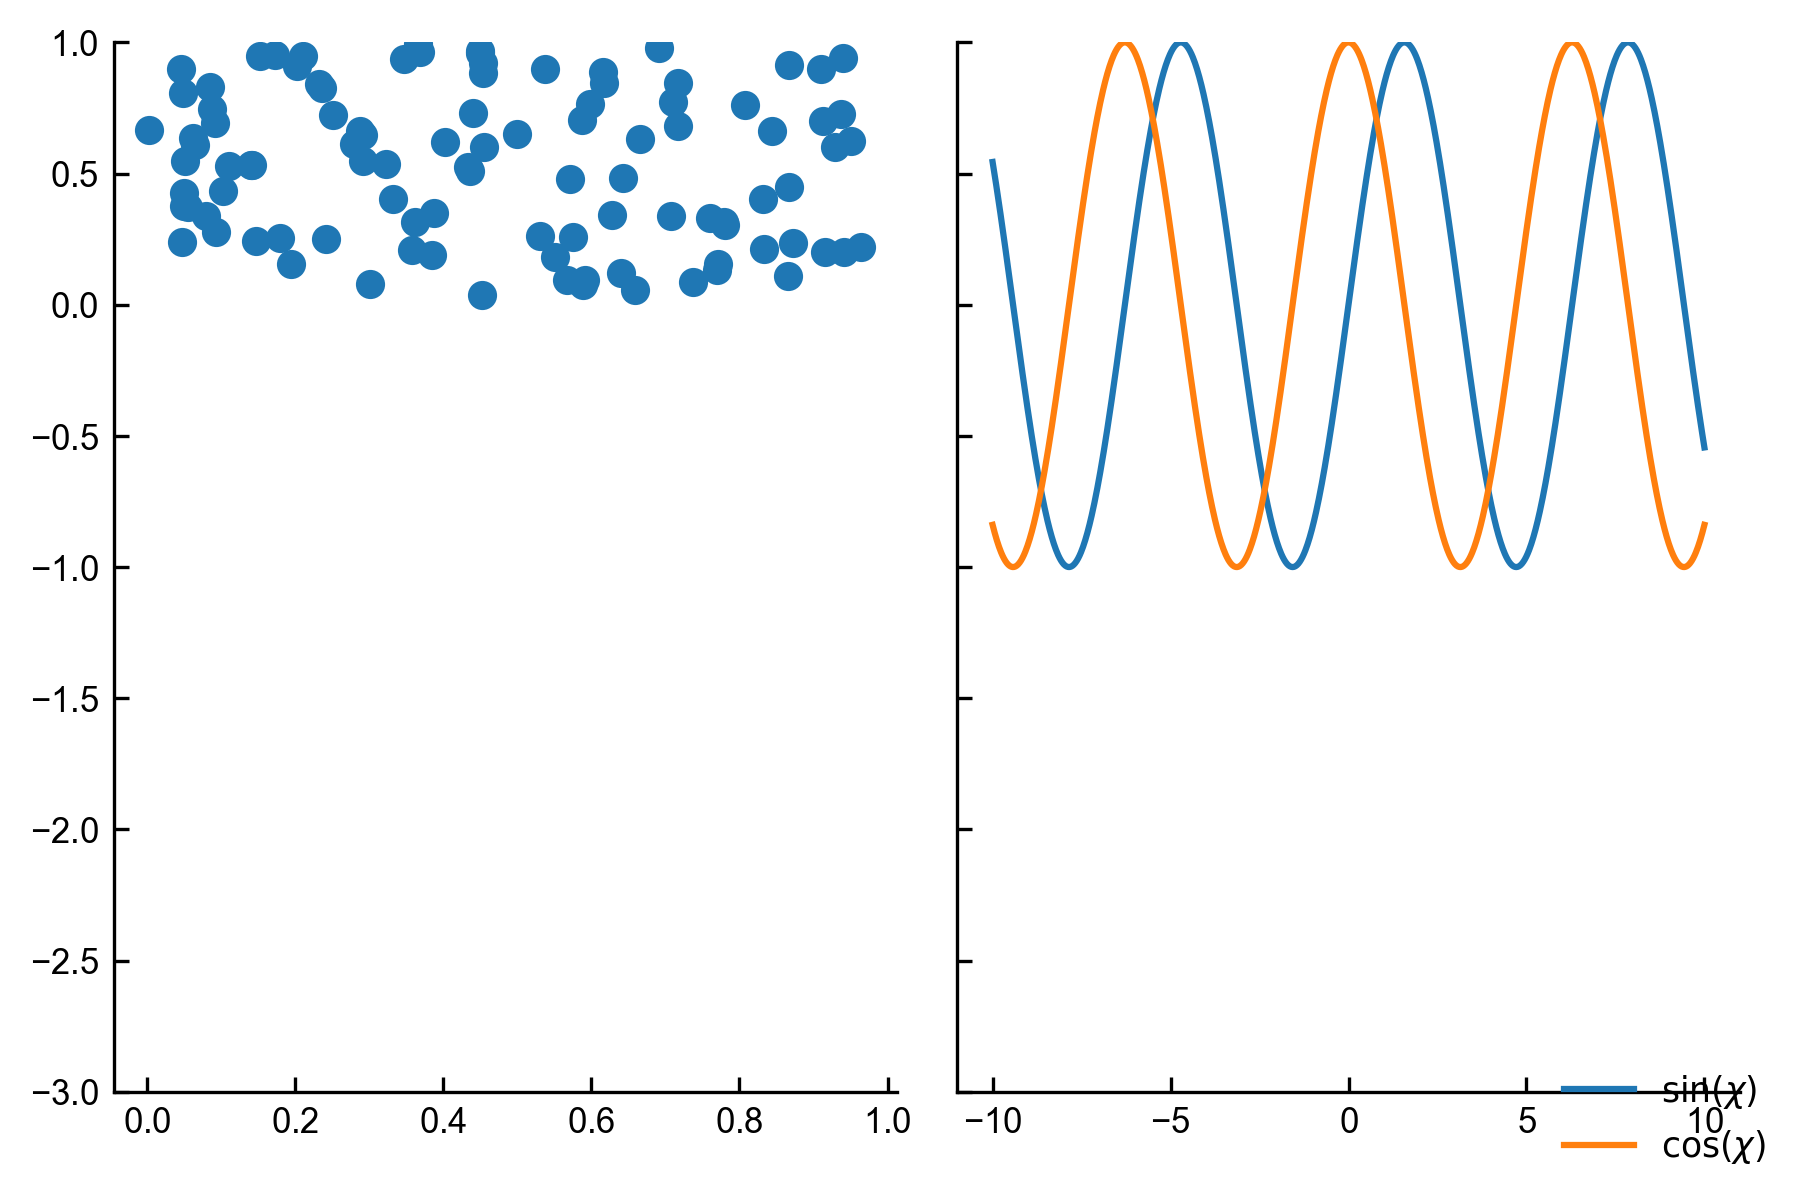

In [87]:
# using a legend
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].scatter(X, Y)
axs[1].plot(X2, Y2, label="$\sin(\chi)$")
axs[1].plot(X2, Y3, label="$\cos(\chi)$")
axs[1].set_ylim(-3, 1)
fig.tight_layout()
fig.legend(loc='lower right')

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 6), sharey=True)
axs[0].scatter(X, Y)
axs[1].plot(X2, Y2, label="$\sin(\chi)$")
axs[1].plot(X2, Y3, label="$\cos(\chi)$")
axs[1].set_ylim(-3, 1)
axs[1].text()
fig.tight_layout()

## Other types of matplotlib plots

### Bar plots

In [82]:
XB = [0, 1, 2, 3]
H = [2, -1, 4, 3]

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

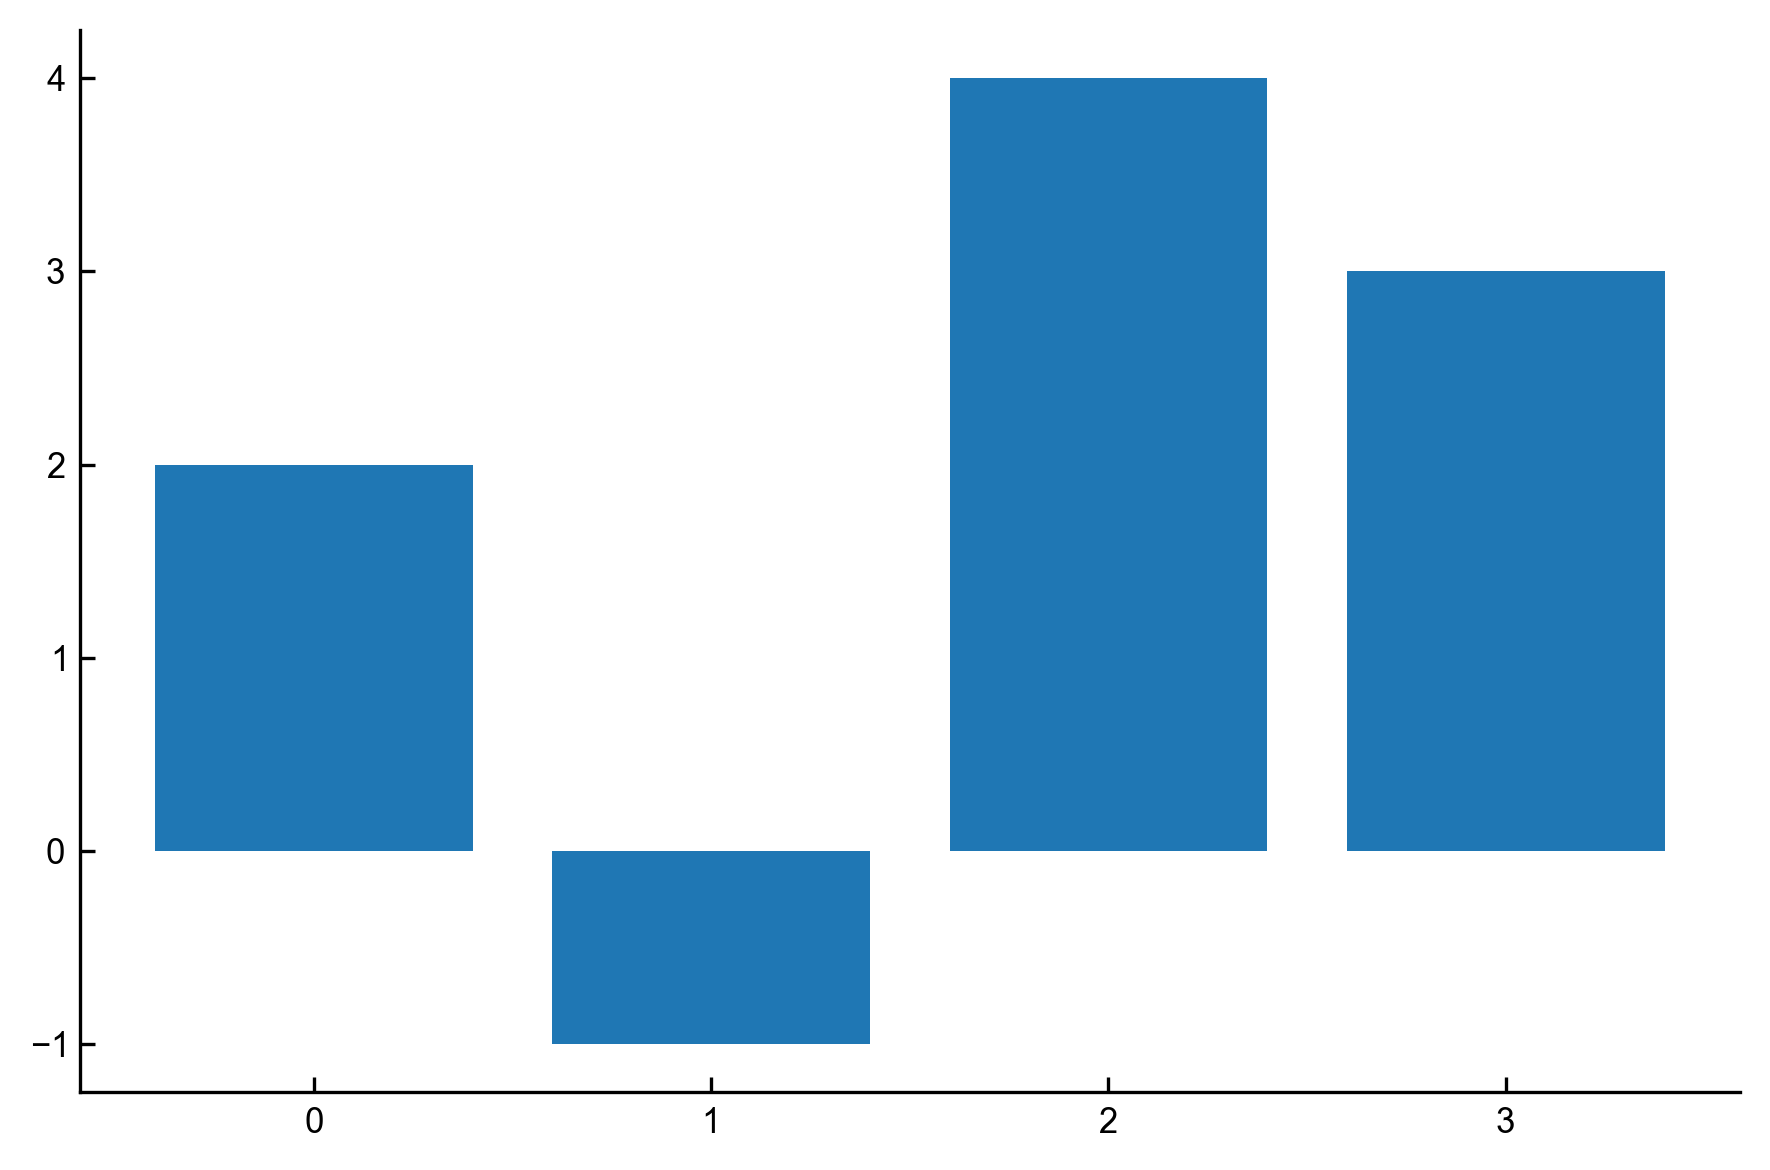

In [88]:
fig, ax = plt.subplots()
ax.bar(XB, H)
ax.set_xticks(XB)
ax.set_xticklabels(XB)

### Histograms

In [94]:
normal_data = np.random.randn(1000)

(array([ 2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,
         2.,  2.,  0.,  2.,  2.,  6.,  6.,  2.,  1.,  7., 12.,  4.,  5.,
         4., 16.,  9., 17., 22., 11.,  8., 17., 19., 15., 18., 14., 21.,
        18., 25., 27., 15., 20., 30., 27., 30., 26., 27., 22., 14., 24.,
        19., 19., 18., 17., 23., 22., 16., 31., 17., 13., 27., 15., 20.,
        12.,  9., 13., 15., 11., 15.,  8.,  8., 11.,  6., 11., 10.,  4.,
         6., 11.,  1.,  6.,  5.,  4.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,
         2.,  1.,  2.,  0.,  3.,  1.,  2.,  0.,  1.]),
 array([-3.04975116, -2.98886425, -2.92797735, -2.86709045, -2.80620354,
        -2.74531664, -2.68442974, -2.62354283, -2.56265593, -2.50176903,
        -2.44088212, -2.37999522, -2.31910832, -2.25822141, -2.19733451,
        -2.13644761, -2.0755607 , -2.0146738 , -1.9537869 , -1.89289999,
        -1.83201309, -1.77112619, -1.71023928, -1.64935238, -1.58846548,
        -1.52757857, -1.46669167, -1.40580477, -1.34491786, -1.284030

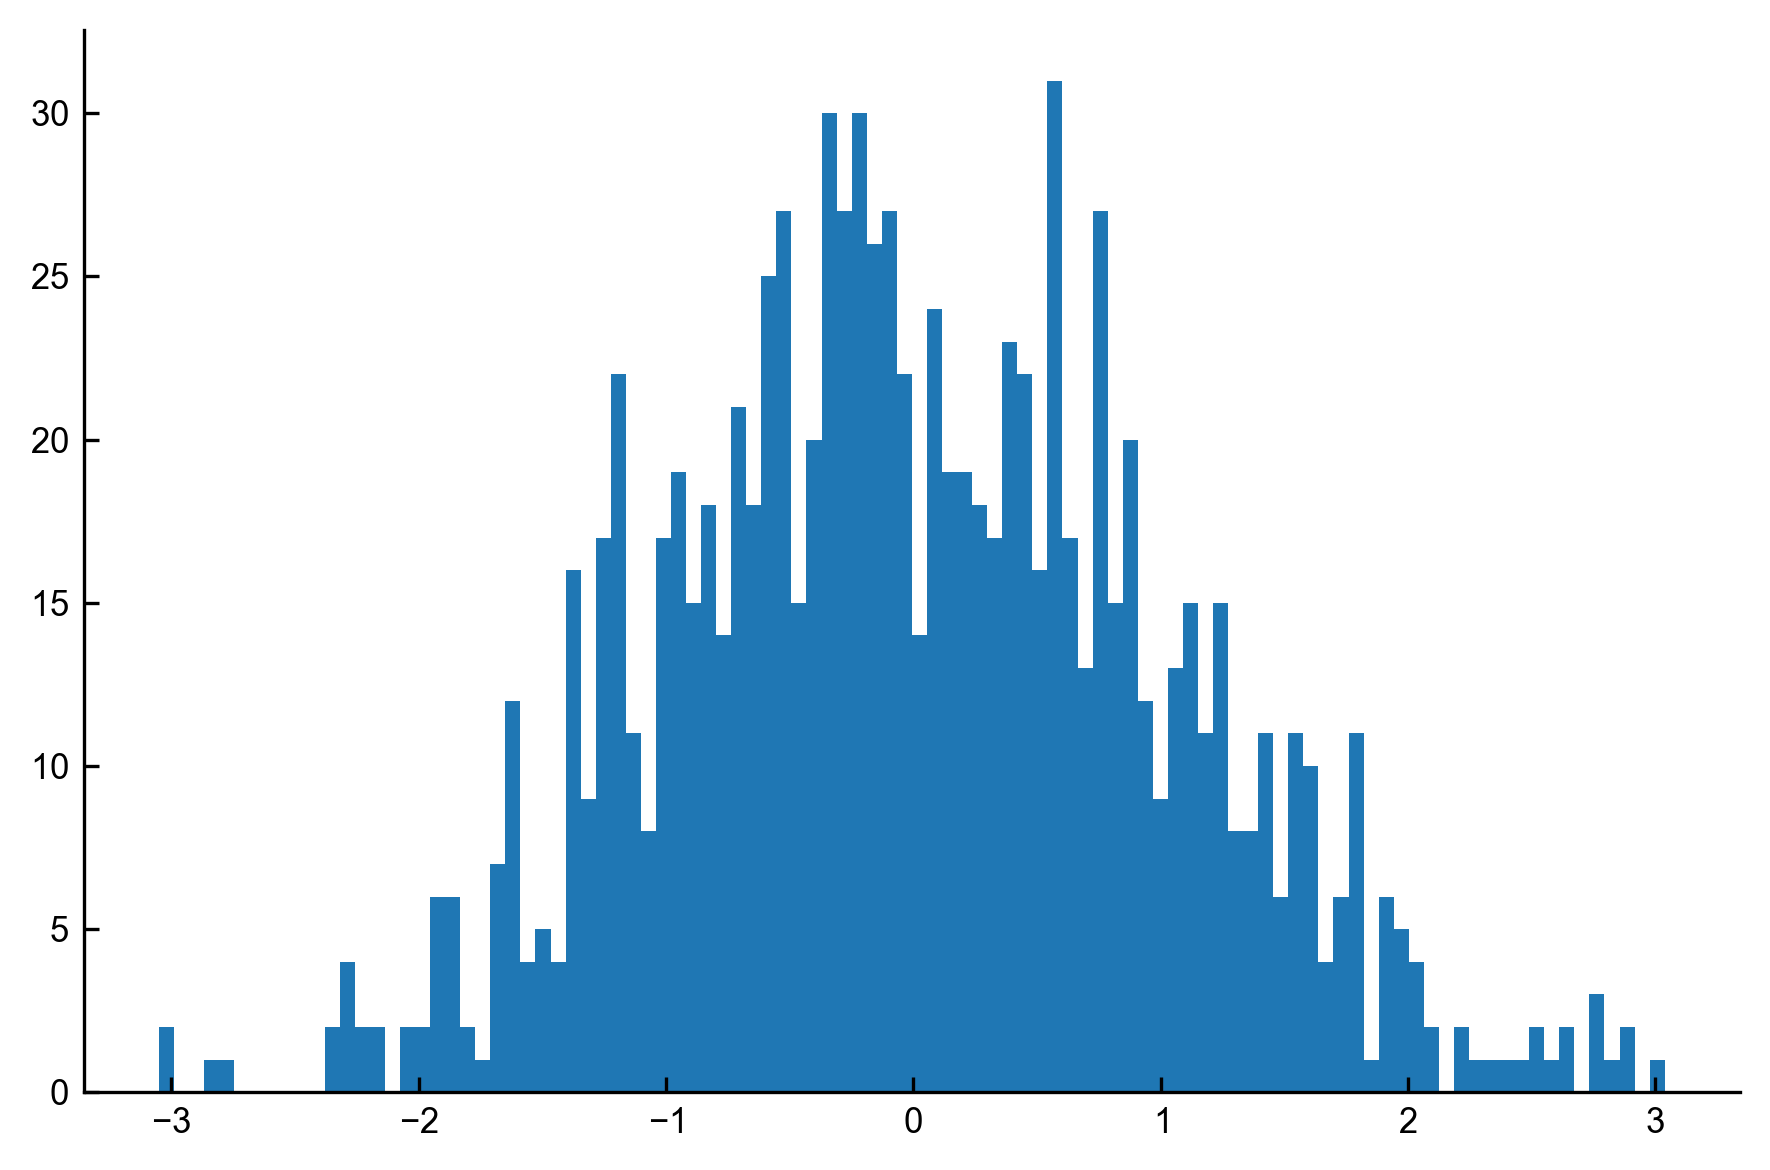

In [95]:
fig, ax = plt.subplots()
ax.hist(normal_data, bins=100)

### imshow & matshow

In [102]:
matrix_data = np.random.randn(10, 10)

In [112]:
a = ax.spines["top"]

In [ ]:
a.visi

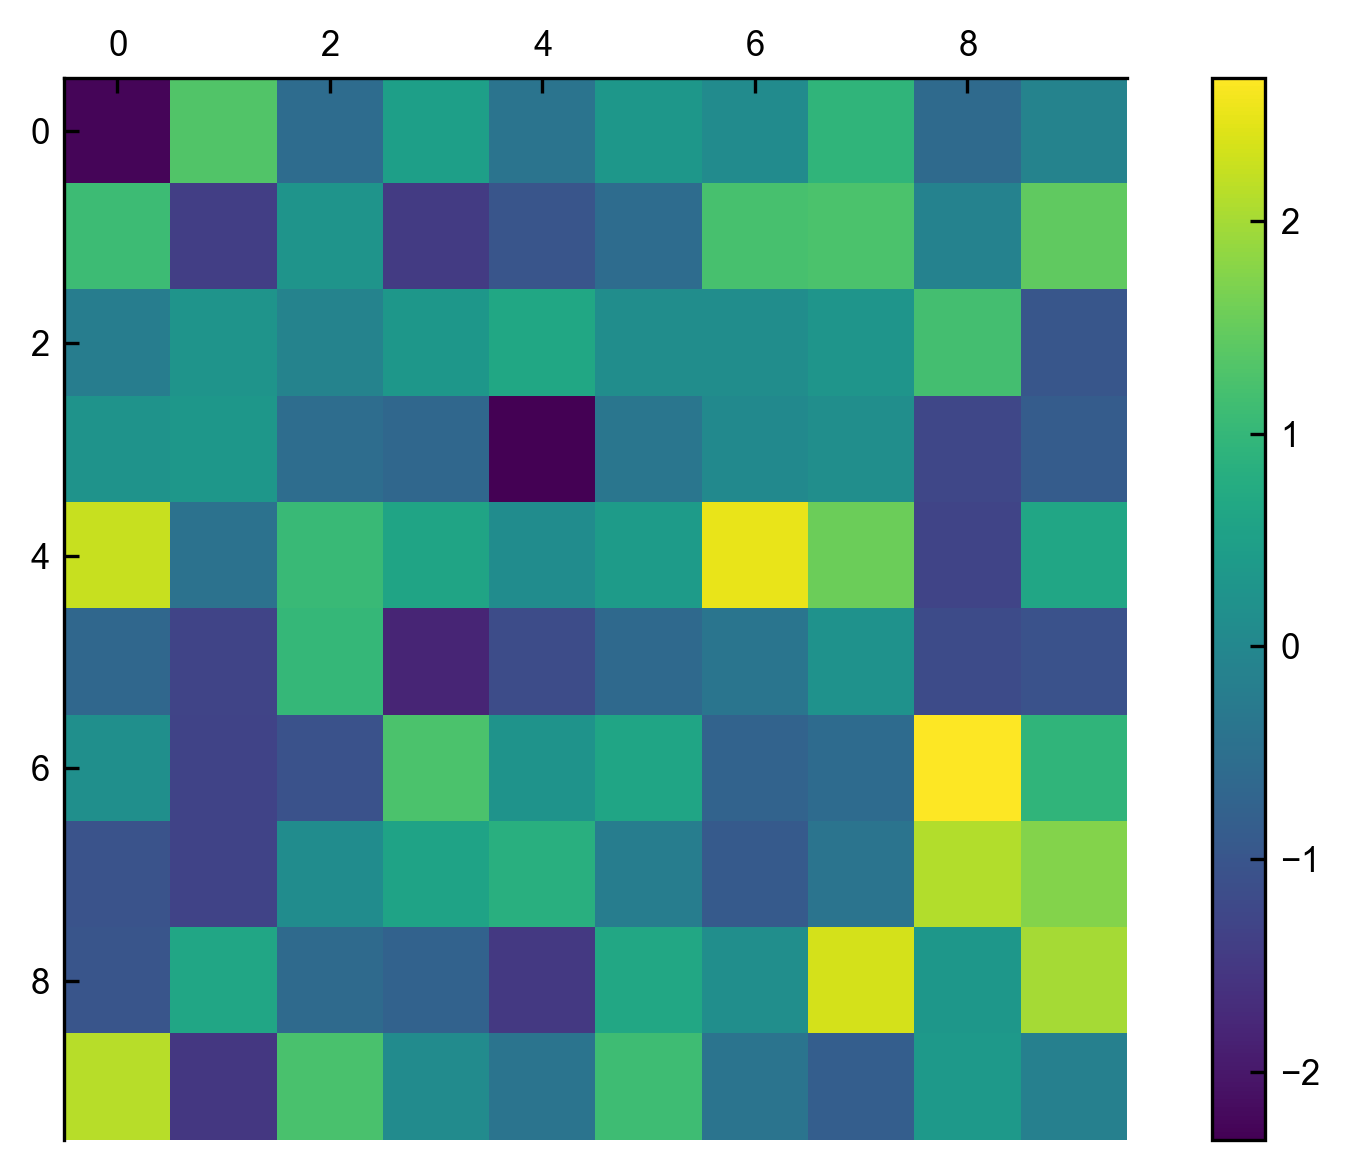

In [115]:
fig, ax = plt.subplots()
mappable = ax.matshow(matrix_data)
ax.spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(False)
ax.xaxis.set_ticks_position('top')
fig.colorbar(mappable)


## Plotting uncertainty 

### Error bars

### Boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0bf92d910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0bf958040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0bf92d5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0bf9586d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0bf958a00>],
 'means': []}

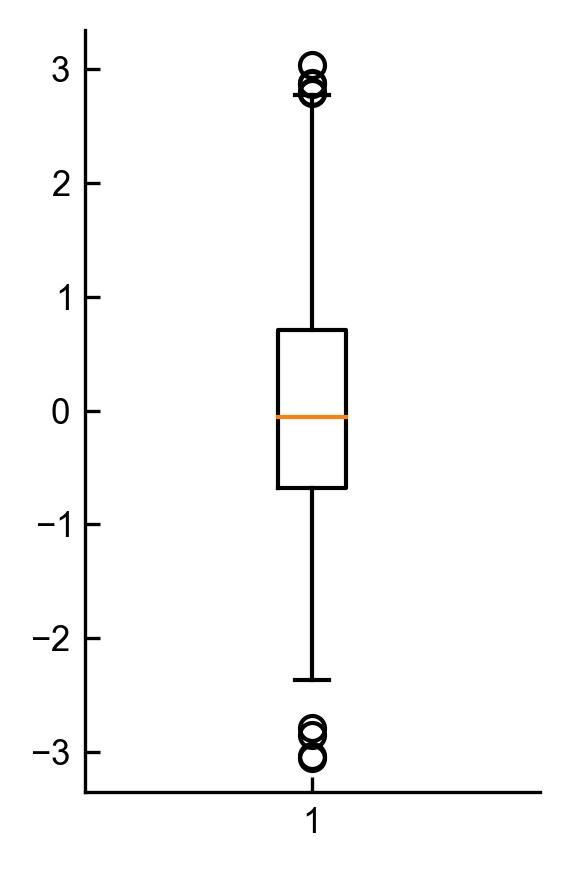

In [100]:
fig, ax = plt.subplots(figsize = (2,3))
ax.boxplot(normal_data)

### Fill between

In [135]:
# Generating 100 curves with random noise

X = np.linspace(0, 10, 1000)
Y = np.sin(X)
Ys = np.array([Y + .1*np.cumsum(np.random.randn(1000)) for i in range(100)])

In [136]:
# Checking the chape

Ys.shape

(100, 1000)

In [137]:
# Finding the median and IQR

Y_median = np.percentile(Ys, 50, axis=0)
Y_Q1 = np.percentile(Ys, 25, axis=0) 
Y_Q3 = np.percentile(Ys, 75, axis=0)

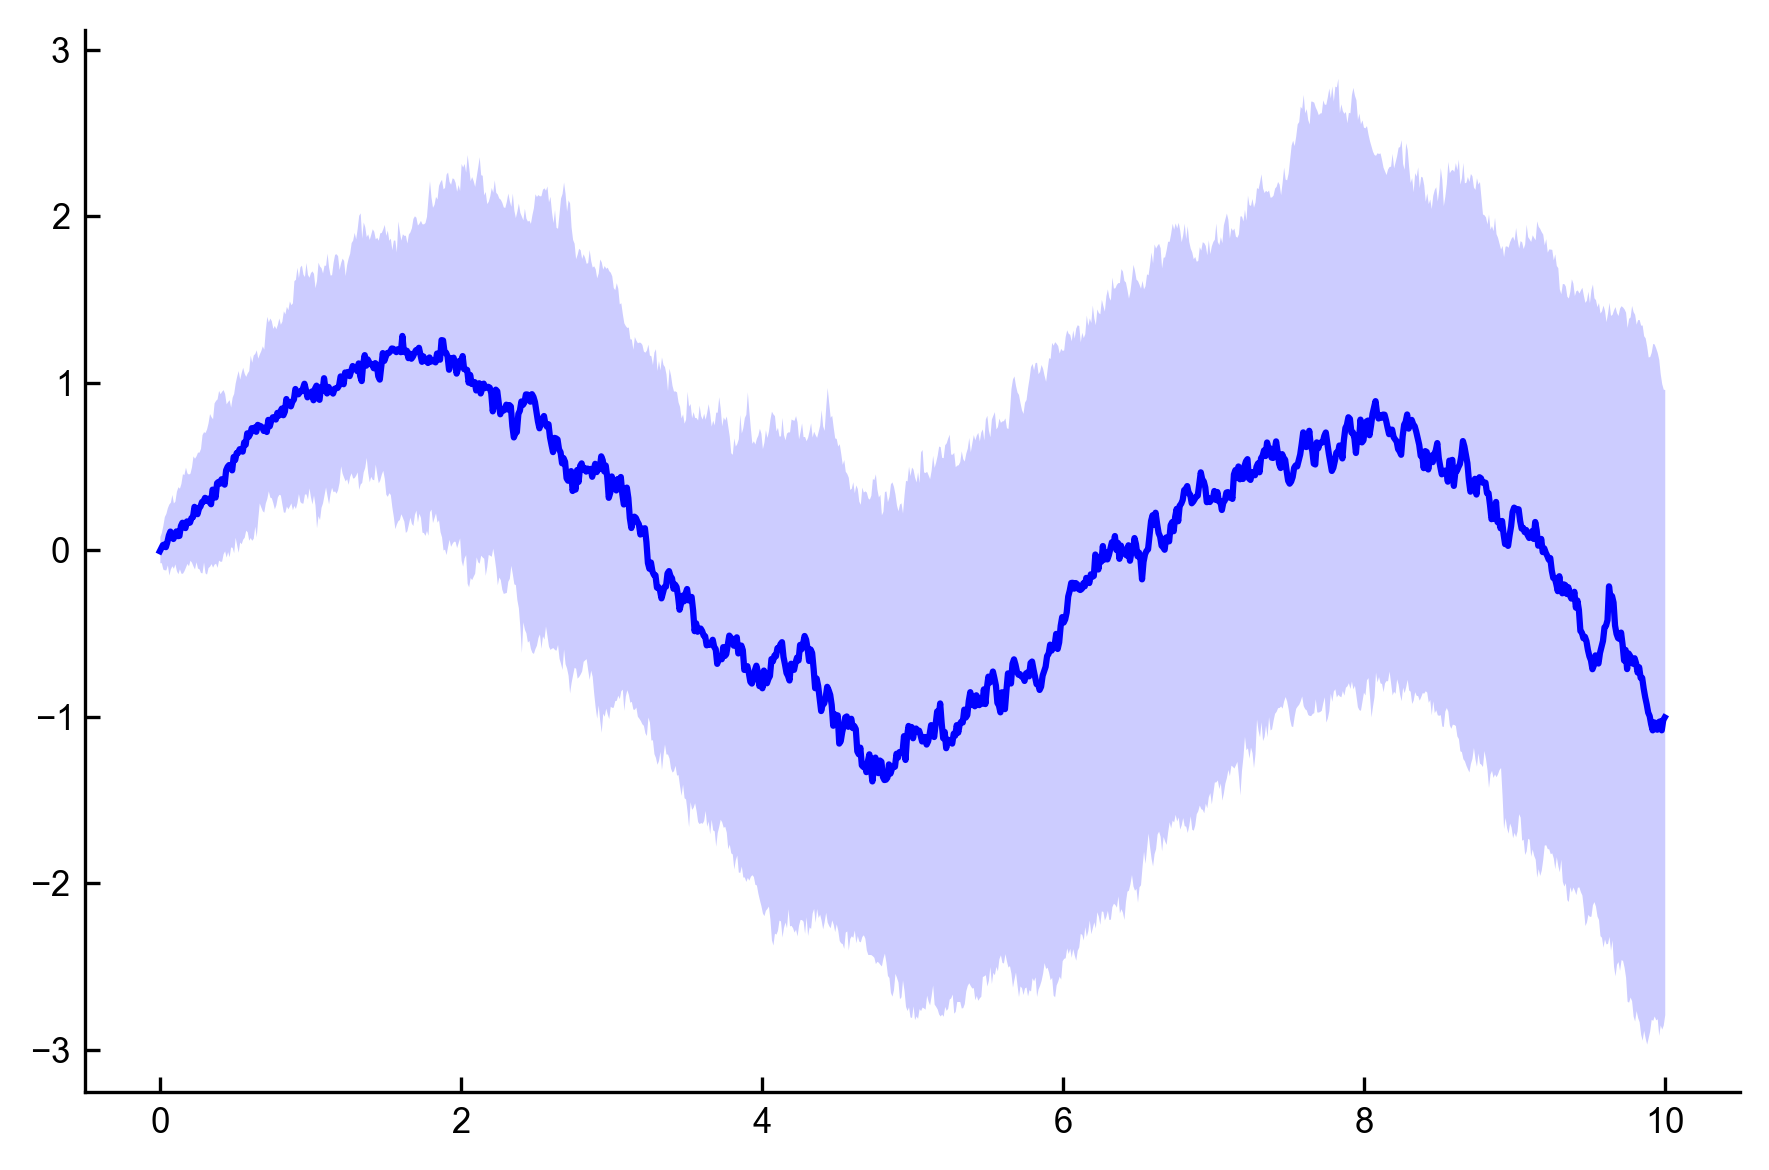

In [145]:
# Plotting the median and the IQR

fig, ax = plt.subplots()
ax.plot(X, Y_median, color="blue")
ax.fill_between(X, Y_Q1, Y_Q3, alpha=.2, color="blue", lw=0)

### Raw data

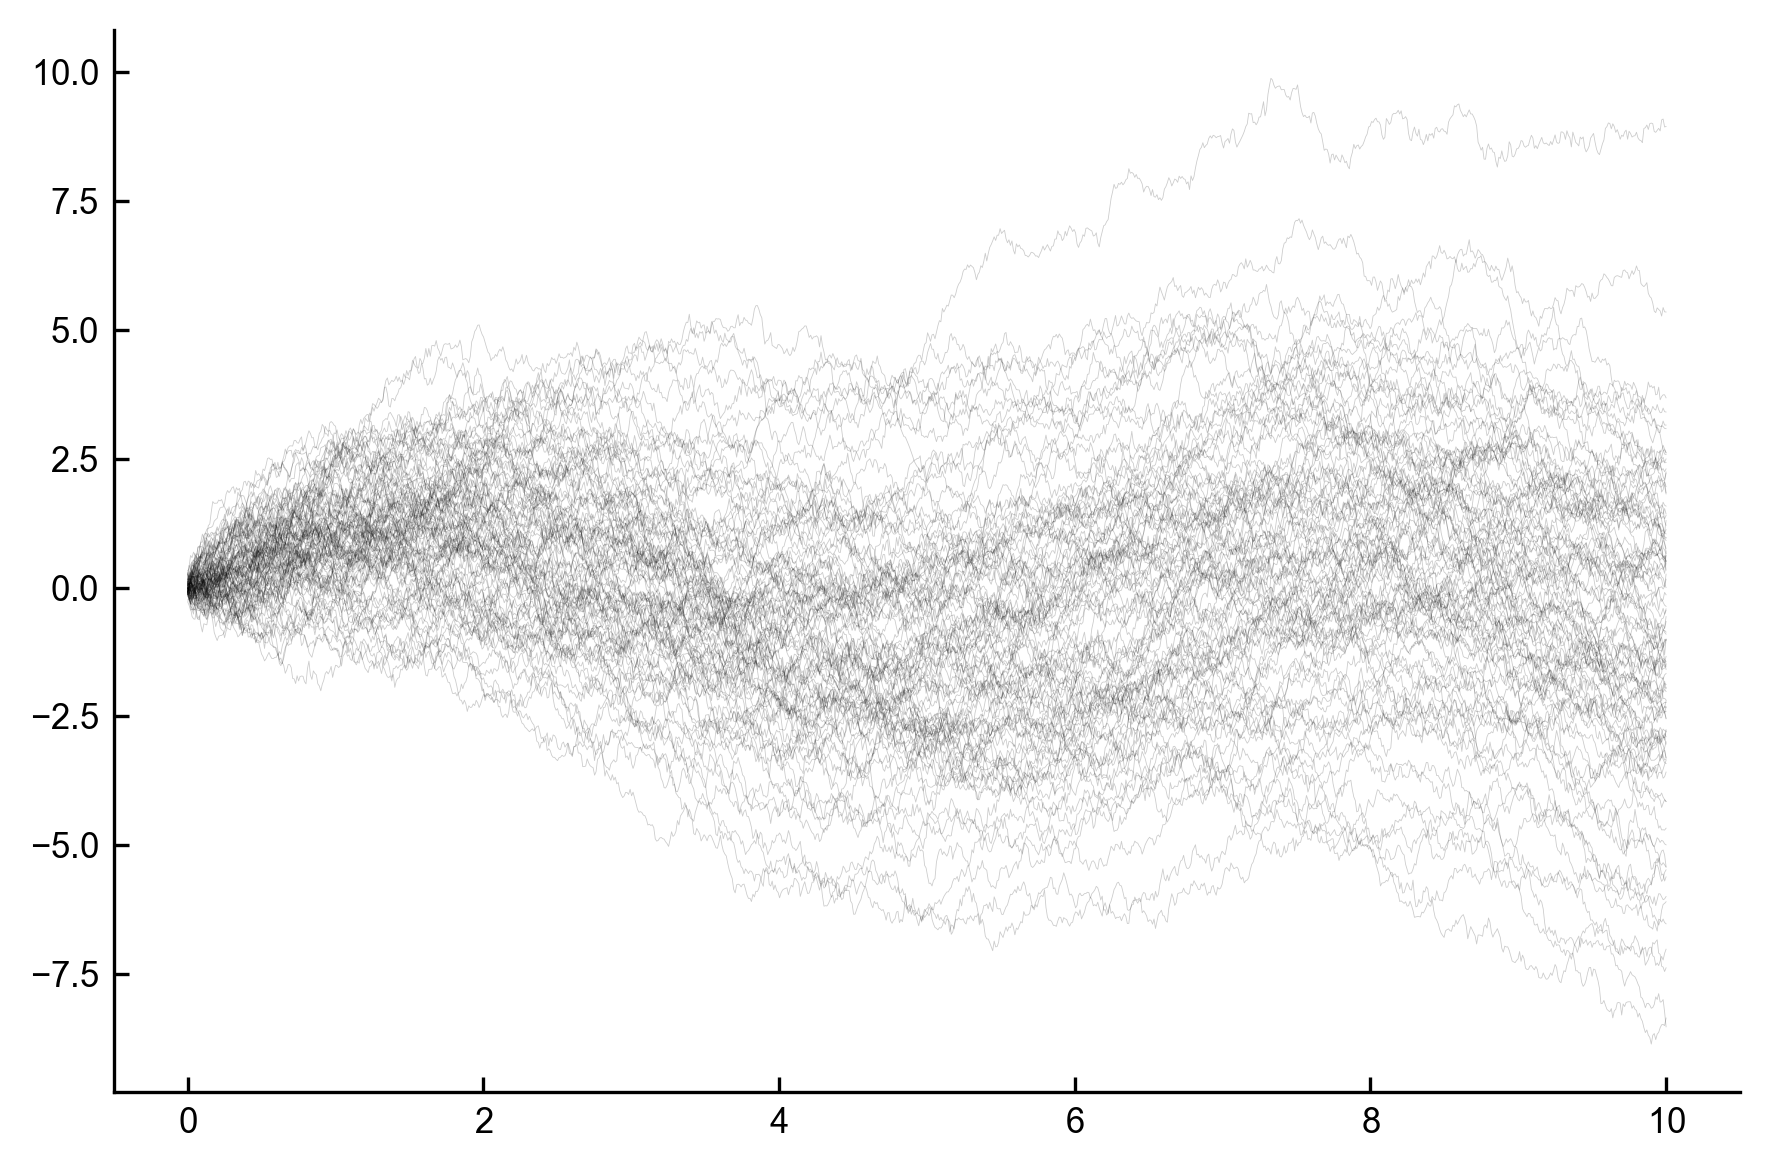

In [148]:
# Plotting all the data using transparency

fig, ax = plt.subplots()
for Y in Ys:
    ax.plot(X, Y, color='k', alpha=.2, lw=.2)

## Saving plots

In [151]:
# As PNG
fig.savefig("my_plot.png", dpi=300)
# As PDF
fig.savefig("my_plot.pdf")
# As SVG
fig.savefig("my_plot.svg")